In [4]:
# 분석 라이브러리 
import pandas as pd
import numpy as np
# 시각화 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium




In [5]:
# customer - 고객 데이터 100000 * 15 / 패션컴퍼스에 가입한 고객 데이터/ 고객 id와 성별, 나이, 디바이스 운영체제, 거주지, 가입날짜 등 정보
import pandas as pd

df_cus = pd.read_csv('customer.csv')
df_cus.head()


,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [6]:
# first_name, last_name, device_id, home_country 제거
# email, device_version, 위도 경도 제거 보류 
# 생일이 필요하나 ? - 년도만 필요하지 않을까 ? 

In [7]:
# 불필요 컬럼 삭제 
df_cus.drop(columns = ['first_name','last_name', 'device_id', 'home_country'] , inplace=True)



In [8]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   username            100000 non-null  object 
 2   email               100000 non-null  object 
 3   gender              100000 non-null  object 
 4   birthdate           100000 non-null  object 
 5   device_type         100000 non-null  object 
 6   device_version      100000 non-null  object 
 7   home_location_lat   100000 non-null  float64
 8   home_location_long  100000 non-null  float64
 9   home_location       100000 non-null  object 
 10  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.4+ MB


In [9]:
df_cus

,customer_id,username,email,gender,birthdate,device_type,device_version,home_location_lat,home_location_long,home_location,first_join_date
0,2870,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,2019-07-21
1,8193,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,2017-07-16
2,7279,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,2020-08-23
3,88813,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,2021-10-03
4,82542,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,2021-04-11
...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,Android 4.3.1,-5.203523,105.635530,Lampung,2020-10-17
99996,72065,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,Android 8.0.0,4.474702,95.904876,Aceh,2017-11-25
99997,32818,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,Android 11,-3.330376,127.028348,Maluku,2018-09-01
99998,75597,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,Android 7.1,-2.173114,101.495913,Jambi,2020-05-31


In [10]:
df_cus.describe()

# 년도만 해서 몇 년생이 많은지 알아보자 


,customer_id,home_location_lat,home_location_long
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,-5.106390,110.936081
std,28867.657797,3.088183,6.343363
min,1.000000,-10.845002,95.275319
25%,25000.750000,-7.372650,106.860628
50%,50000.500000,-6.240087,110.162010
75%,75000.250000,-3.092254,113.171187
max,100000.000000,5.818355,140.993119


In [11]:
# 데이터타입 변환 함수 
def columns_datetype_change(data, columns, datetype):
    if datetype == 'datetime64':
        data[columns] = pd.to_datetime(data[columns], errors='coerce')
    else:
        data[columns] = data[columns].astype(datetype)
# 정수형, 실수형을 제외한 나머지 데이터타입의 유니크값
def colmuns_unique(data):
    for c in data.columns:
        if data[c].dtype not in ['int64', 'float64']:
            print(f'------------{c}------------')
            print(data[f'{c}'].unique())
            
def memory_small(data):
    for c in data.columns:
        if data[c].dtype == 'int64':
            data[c] = data[c].astype('int32')
        elif data[c].dtype == 'object' and data[c].nunique()<10:
            data[c] = data[c].astype('category')

In [12]:
# 데이터 타입 변환
columns_datetype_change(df_cus,'first_join_date','datetime64')
columns_datetype_change(df_cus,'birthdate','datetime64')

# 가입날짜 년, 월 컬럼 따로 생성 
df_cus['join_month'] = df_cus['first_join_date'].dt.strftime('%m')
df_cus['join_year'] = df_cus['first_join_date'].dt.strftime('%Y')
df_cus['join_date'] = df_cus['first_join_date'].dt.strftime('%Y-%m')

# 주문 날짜 년, 일 컬럼을 따로 생성해서 가입 후 첫 구매까지 기간 컬럼 생성하기 
# 비활성 고객 - 1회 이상 구매 고객/ 구매하지 않은 고객 // 전체기간의 비활성 고객 비율 / 전체 기간의 재구매율 / 월별 비활성 고객율 (5년정도?) / 연도별, 나이별 비활성 고객 수 파악 / 일회성 고객 파악 (주요 구매 제품) / 프로모션에 따른 재구매율 

In [13]:
# 가입일 당시의 나이 계산
df_cus['age'] = (df_cus['first_join_date'] - df_cus['birthdate']).dt.days // 365

In [14]:
#브랜드와 제품사양 분리
df_cus['device'] = df_cus['device_version'].str.split().str[0]
df_cus['version'] = df_cus['device_version'].str.split().str[1:].apply(' '.join)
df_cus['device'] = df_cus['device'].str.replace(';', '')

In [15]:
df_cus

,customer_id,username,email,gender,birthdate,device_type,device_version,home_location_lat,home_location_long,home_location,first_join_date,join_month,join_year,join_date,age,device,version
0,2870,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,2019-07-21,07,2019,2019-07,23,iPhone,CPU iPhone OS 14_2_1 like Mac OS X
1,8193,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,2017-07-16,07,2017,2017-07,23,Android,2.2.1
2,7279,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,2020-08-23,08,2020,2020-08,31,iPad,CPU iPad OS 4_2_1 like Mac OS X
3,88813,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,2021-10-03,10,2021,2021-10,30,iPad,CPU iPad OS 14_2 like Mac OS X
4,82542,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,2021-04-11,04,2021,2021-04,20,iPhone,CPU iPhone OS 10_3_3 like Mac OS X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,Android 4.3.1,-5.203523,105.635530,Lampung,2020-10-17,10,2020,2020-10,19,Android,4.3.1
99996,72065,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,Android 8.0.0,4.474702,95.904876,Aceh,2017-11-25,11,2017,2017-11,19,Android,8.0.0
99997,32818,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,Android 11,-3.330376,127.028348,Maluku,2018-09-01,09,2018,2018-09,25,Android,11
99998,75597,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,Android 7.1,-2.173114,101.495913,Jambi,2020-05-31,05,2020,2020-05,19,Android,7.1


customer.head()

In [16]:
df_map = df_cus.iloc[:, 7: 9]
df_map

,home_location_lat,home_location_long
0,-1.043345,101.360523
1,-6.212489,106.818850
2,-8.631607,116.428436
3,1.299332,115.774934
4,-2.980807,114.924675
...,...,...
99995,-5.203523,105.635530
99996,4.474702,95.904876
99997,-3.330376,127.028348
99998,-2.173114,101.495913


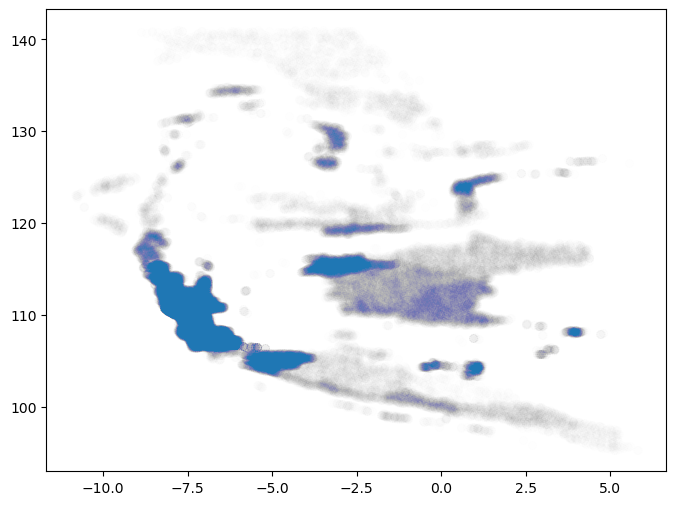

In [17]:
# 위도와 경도 -- > 색이 진한 곳이 주문량이 높은 지역  

plt.figure(figsize=(8, 6))

plt.scatter(x = df_map['home_location_lat'], y=df_map['home_location_long'], alpha = 0.003, s= 35)
plt.show()

In [18]:
df_map_female = df_cus[df_cus['gender'] =='F']
df_map_male = df_cus[df_cus['gender'] =='M']

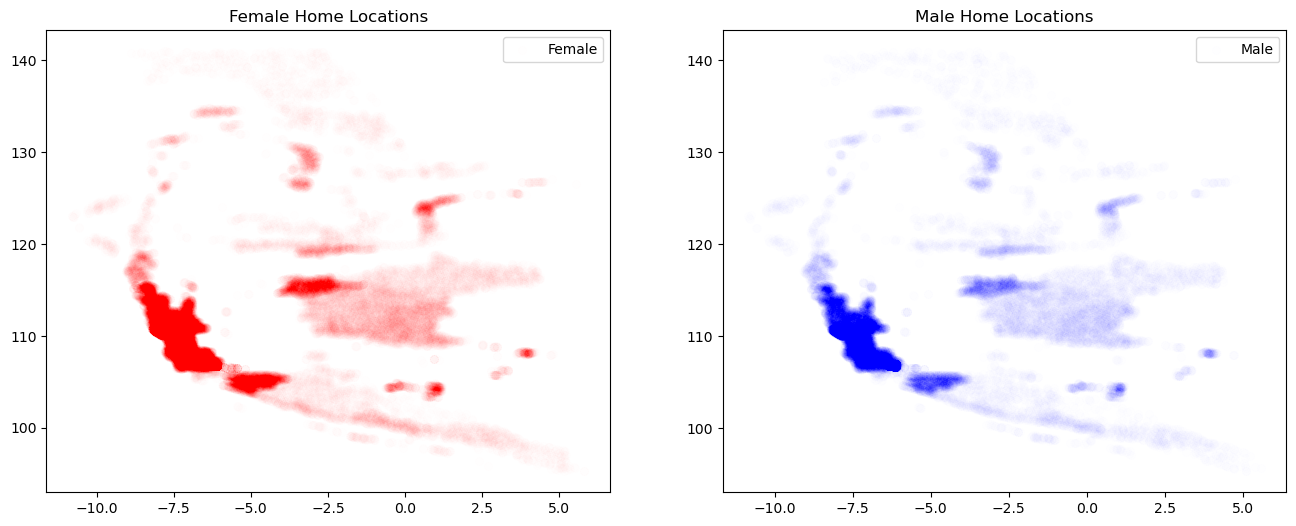

In [19]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First subplot for Female data
ax1.scatter(x=df_map_female['home_location_lat'], y=df_map_female['home_location_long'], alpha=0.003, s=35, color='red', label='Female')
ax1.set_title('Female Home Locations')

# Second subplot for Male data
ax2.scatter(x=df_map_male['home_location_lat'], y=df_map_male['home_location_long'], alpha=0.003, s=35, color='blue', label='Male')
ax2.set_title('Male Home Locations')

# Add legends to both subplots
ax1.legend()
ax2.legend()

plt.show()

In [20]:
df_click = pd.read_csv('click_stream_new.csv', on_bad_lines='skip')
df_click

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,NaN,NaN,NaN,NaN,Bekas,NaN,NaN
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,19820.0,1.0,88918.0,NaN,NaN,NaN,NaN
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [34]:
df_transaction = pd.read_csv('transaction_new.csv')
df_transaction

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [44]:
unique = df_transaction.promo_code.unique()

In [38]:
df_tran_session_promo = df_transaction[['session_id', 'promo_code', 'shipment_location_lat','shipment_location_long']]
df_tran_session_promo

,session_id,promo_code,shipment_location_lat,shipment_location_long
0,3abaa6ce-e320-4e51-9469-d9f3fa328e86,WEEKENDSERU,-8.227893,111.969107
1,2ee5ead1-f13e-4759-92df-7ff48475e970,NaN,3.013470,107.802514
2,93325fb6-eb00-4268-bb0e-6471795a0ad0,NaN,-2.579428,115.743885
3,bcad5a61-1b67-448d-8ff4-781d67bc56e4,NaN,-3.602334,120.363824
4,df1042ab-13e6-4072-b9d2-64a81974c51a,NaN,-3.602334,120.363824
...,...,...,...,...
1254580,484eecde-9f4a-42de-a8df-7ce6668101f4,NaN,-6.869535,111.077145
1254581,954e1211-4d45-4d0b-ba84-53e80119592c,AZ2022,-8.677264,115.176947
1254582,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,WEEKENDSERU,-6.185498,106.831093
1254583,bb6e5426-a3f3-426a-b99d-79173eaa234b,AZ2022,-7.155977,110.891858


In [42]:
# nan 확인
df_promo_nan = df_tran_session_promo[df_tran_session_promo['promo_code'].isnull()]

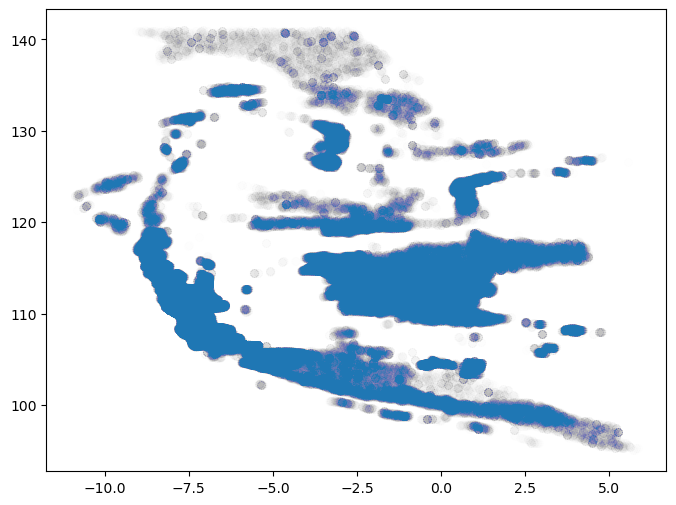

In [43]:
# 위도와 경도 -- > 색이 진한 곳이 프로모션 미사용  --> 대체적으로 미사용 


plt.figure(figsize=(8, 6))

plt.scatter(x = df_promo_nan['shipment_location_lat'], y=df_promo_nan['shipment_location_long'], alpha = 0.003, s= 35)
plt.show()

In [69]:
df_transaction.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

In [71]:
filtered_df = df_transaction[~df_transaction['promo_code'].isna()]
unique = filtered_df.promo_code.unique()

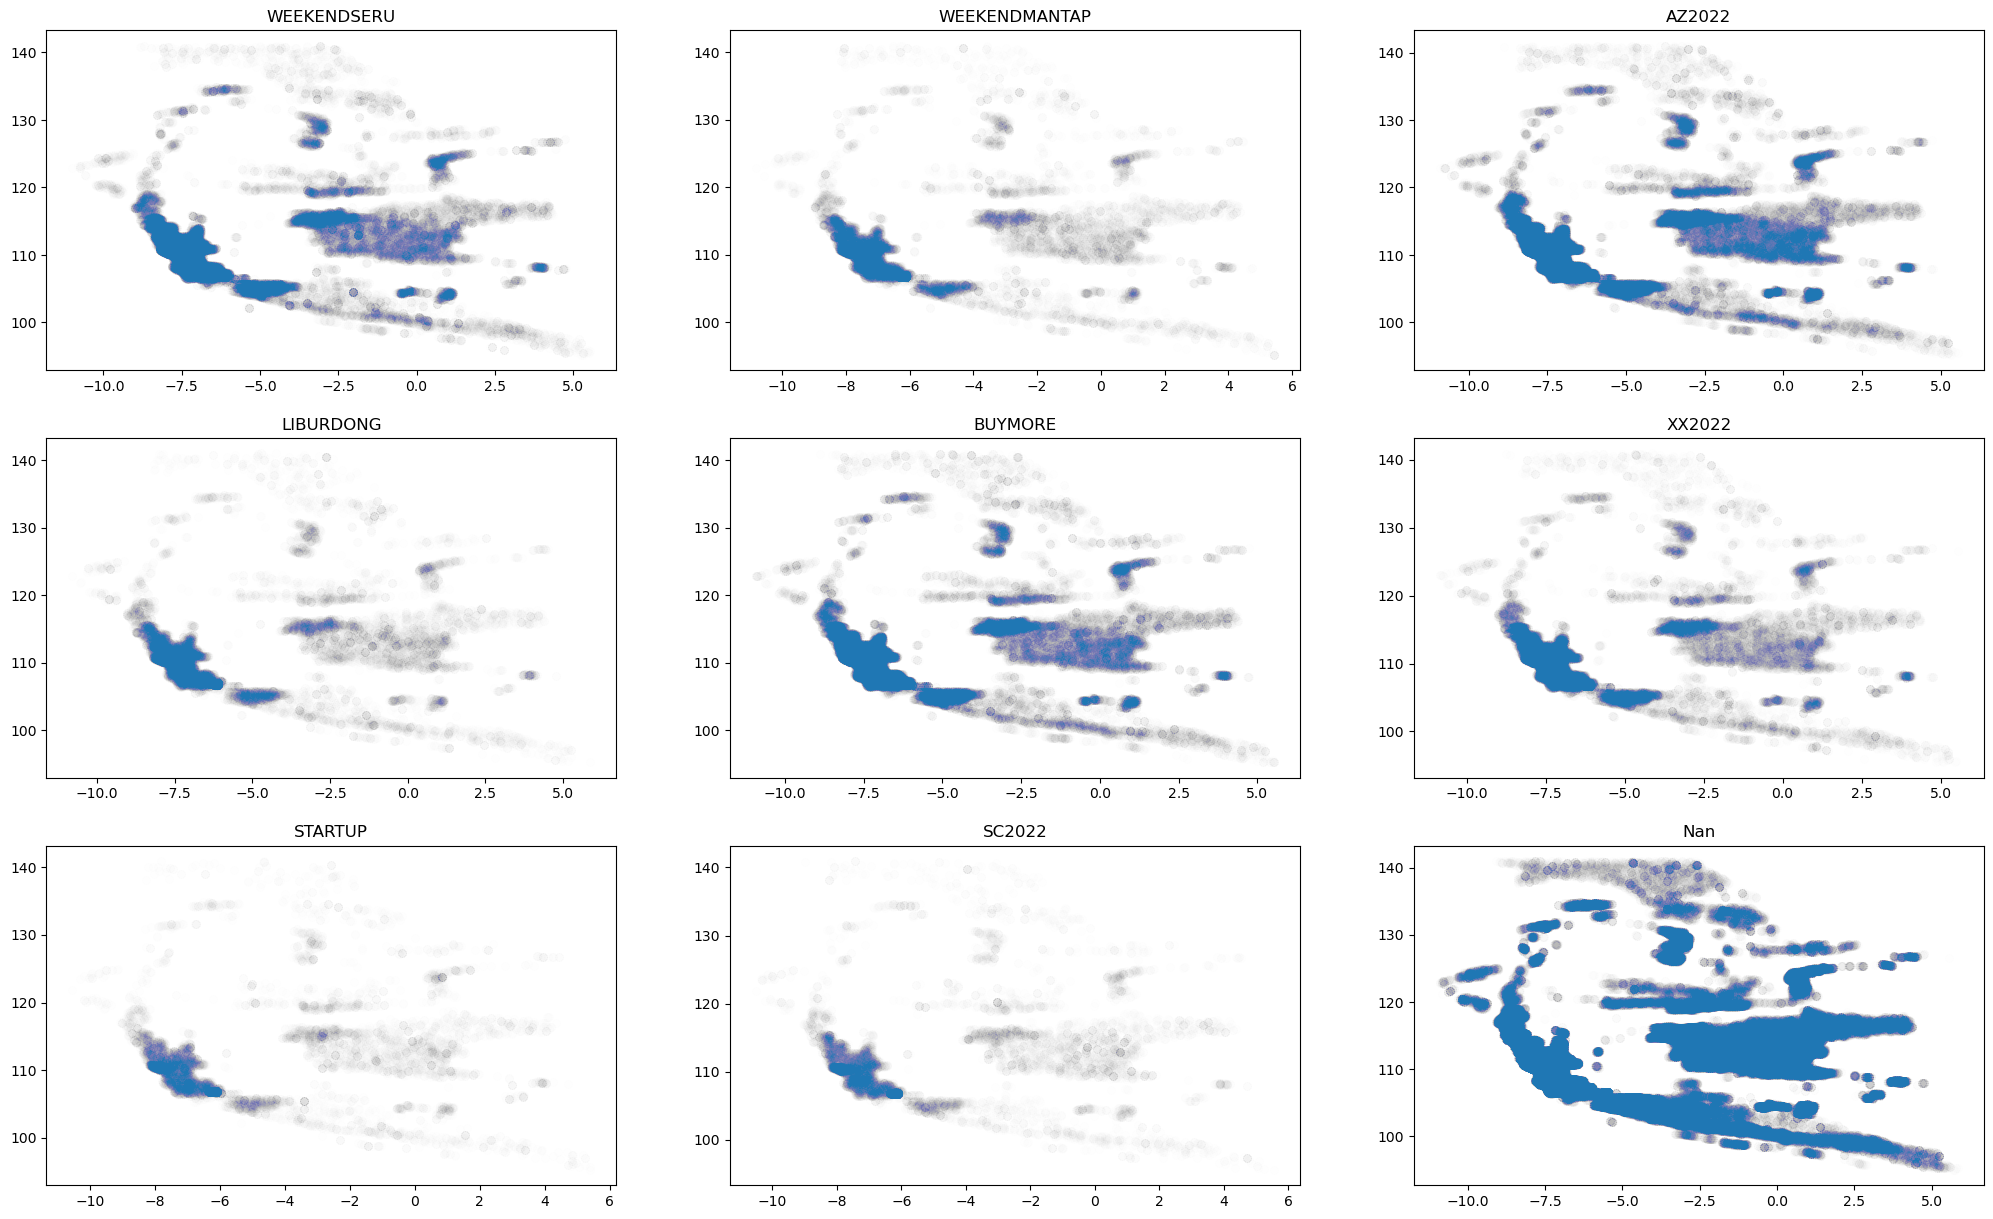

In [76]:
# 각 프로모션 별로 지도 확인
#  수도에서는 코드 사용률이 높은 것으로 나타난다 - 외곽지역은 미사용 
#  추가적으로 중앙지역 (칼리만탄섬)에서 사용률이 높은 코드가 몇 개 있음 
 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
axes = axes.flatten()

for i, string in enumerate(unique):
    
    ax = axes[i]

    df_promo = df_tran_session_promo[df_tran_session_promo['promo_code']== f"{string}" ]
    ax.scatter(x = df_promo['shipment_location_lat'], y=df_promo['shipment_location_long'], alpha = 0.003, s= 35)
    ax.set_title(string)
    
df_promo_nan = df_tran_session_promo[df_tran_session_promo['promo_code'].isnull()]
axes[8].scatter(x = df_promo_nan['shipment_location_lat'], y=df_promo_nan['shipment_location_long'], alpha = 0.003, s= 35)
axes[8].set_title('Nan');

In [81]:
# 나이 나누기 

df_tran_cus = pd.read_csv('tranfinal_cus.csv')
df_tran_cus

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,...,first_join_date,join_date,join_month,join_day,join_year,created_at_3,period_enrollment,age,adjusted_age,age2
0,2020-08-23 12:53:00,7279,2853.0,15000.0,844751.0,3.0,2 days 16:21:00,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,...,2020-08-23,2020-08,8,23,2020,2020-08-23,0.0,34,33,30
1,2020-08-31 13:34:00,7279,0.0,10000.0,391341.0,1.0,3 days 16:15:00,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,...,2020-08-23,2020-08,8,23,2020,2020-08-31,8.0,34,33,30
2,2020-09-08 13:38:00,7279,0.0,0.0,154220.0,1.0,5 days 21:48:00,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,...,2020-08-23,2020-08,8,23,2020,2020-09-08,16.0,34,33,30
3,2020-09-16 13:48:00,7279,0.0,10000.0,412502.0,2.0,3 days 08:50:00,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,70d1c010-60e4-440a-80df-9efb0132cfb7,Nopromo,...,2020-08-23,2020-08,8,23,2020,2020-09-16,24.0,34,33,30
4,2020-09-24 13:32:00,7279,0.0,10000.0,406435.0,2.0,2 days 07:12:00,1a9d2de2-8c8c-43f3-8ccb-9fbba08ea6e1,a083d201-314b-4b5d-9b12-0f2b6010846d,Nopromo,...,2020-08-23,2020-08,8,23,2020,2020-09-24,32.0,34,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531743,2021-12-07 17:31:00,40573,0.0,10000.0,1200173.0,4.0,4 days 20:38:00,6324e721-b59b-4c8b-9570-5ad30112be1e,f22b54dd-2766-4ac4-9e8e-9fb4572f6b03,Nopromo,...,2021-07-17,2021-07,7,17,2021,2021-12-07,143.0,36,36,30
531744,2022-01-23 19:01:00,40573,4532.0,10000.0,110483.0,1.0,2 days 06:40:00,65367fff-1522-4c80-a0f7-1306676bd947,4bb58af9-b2df-4c48-bcb7-d68749625cee,WEEKENDSERU,...,2021-07-17,2021-07,7,17,2021,2022-01-23,190.0,36,36,30
531745,2022-03-11 19:03:00,40573,0.0,25000.0,276290.0,1.0,2 days 07:13:00,7df40e00-5e2c-40c5-99f7-0e451ca82de4,a9c839a8-f945-4edb-b262-1d9196e2f827,Nopromo,...,2021-07-17,2021-07,7,17,2021,2022-03-11,237.0,36,36,30
531746,2022-04-27 20:00:00,40573,0.0,10000.0,258774.0,1.0,1 days 10:40:00,ae2b3e5b-0053-4671-ae18-f5a60b8a14dd,fcbf4865-4006-4bab-b9ca-3c0c0241c23d,Nopromo,...,2021-07-17,2021-07,7,17,2021,2022-04-27,284.0,36,36,30


In [83]:
df_az = df_tran_cus[df_tran_cus['promo_code'] =='AZ2022']

In [141]:

grades = ['유아', '10대 초반','10대 중반', '10대 후반', '20대 초반', '20대 중반', '20대 후반' ,'30대 초반', '30대 중반', '30대 후반', '40대 이상']
cut_bins = [0, 9, 13, 16, 19, 23, 26, 29, 33, 36, 39, 100]

df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)
df_az


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\1827871464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,...,join_date,join_month,join_day,join_year,created_at_3,period_enrollment,age,adjusted_age,age2,나이대
9,2020-11-03 14:51:00,7279,6354.0,10000.0,190294.0,2.0,2 days 05:55:00,63c67ccb-80c4-46f8-9423-d83b8ee403aa,9edf4bde-c7f9-451f-98e4-baf2b3808359,AZ2022,...,2020-08,8,23,2020,2020-11-03,72.0,34,33,30,30대 초반
29,2021-04-12 19:33:00,7279,4673.0,10000.0,173132.0,1.0,1 days 14:38:00,a91f338a-8045-4f36-a621-62e06ce7b38b,3eceb875-d306-40d7-9678-607e6cfd2860,AZ2022,...,2020-08,8,23,2020,2021-04-12,232.0,34,33,30,30대 초반
45,2021-08-18 22:58:00,7279,3893.0,10000.0,325109.0,1.0,3 days 01:59:00,3c3d1a13-5d11-4d2e-8733-06c10a2aa082,f4e6ed99-65f1-423c-9772-c5f51e006756,AZ2022,...,2020-08,8,23,2020,2021-08-18,360.0,34,33,30,30대 초반
59,2021-12-09 00:14:00,7279,6076.0,50000.0,193561.0,1.0,4 days 21:52:00,61a601df-d61f-4a38-98d7-b6f8238e4e3f,fae1a793-6451-4e5d-b0cf-f837554b0cad,AZ2022,...,2020-08,8,23,2020,2021-12-09,473.0,34,33,30,30대 초반
60,2021-12-17 00:24:00,7279,6194.0,0.0,178030.0,1.0,3 days 20:54:00,0d2d1900-7a64-40b7-ba02-326e0d566496,f7d6b50c-18e7-4e33-943b-77cf085a8baa,AZ2022,...,2020-08,8,23,2020,2021-12-17,481.0,34,33,30,30대 초반
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531717,2021-09-02 03:27:00,32818,6378.0,5000.0,348340.0,1.0,5 days 04:47:00,a5c970cb-ebda-41a7-a972-d2c22e222d8b,0ef56de1-3353-4bb7-9d01-deb5b4bd75ac,AZ2022,...,2018-09,9,1,2018,2021-09-02,1097.0,30,29,30,20대 후반
531718,2021-09-17 03:08:00,32818,3403.0,5000.0,254598.0,1.0,3 days 17:47:00,dc394ae0-c7a9-4905-a3e3-44acbce31e3b,f7f67874-64ec-46ac-a00d-d2ba9b3b4f85,AZ2022,...,2018-09,9,1,2018,2021-09-17,1112.0,30,29,30,20대 후반
531731,2022-03-31 05:31:00,32818,2683.0,10000.0,1779213.0,8.0,1 days 04:57:00,e4c5e0f4-3d68-44f8-a05e-a6455ef2e4c2,6254e995-2e6b-43ec-94f9-c2f5ccd7e404,AZ2022,...,2018-09,9,1,2018,2022-03-31,1307.0,30,29,30,20대 후반
531738,2022-07-14 07:07:00,32818,1412.0,10000.0,200913.0,1.0,2 days 20:38:00,0974a118-3eb8-4667-a106-48323662026a,0fbff61d-4f7d-4764-8c3b-219a0a78b918,AZ2022,...,2018-09,9,1,2018,2022-07-14,1412.0,30,29,30,20대 후반


In [154]:
df_az.describe()

,customer_id,promo_amount,shipment_fee,total_amount,quantity,home_location_lat,home_location_long,join_month,join_day,join_year,period_enrollment,age,adjusted_age,age2
count,11634.000000,11634.000000,11634.000000,1.163400e+04,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000
mean,49903.569452,4983.833505,9272.821042,5.548581e+05,2.196665,-5.065934,110.872646,6.639591,15.640193,2019.012979,777.834966,27.447224,26.788637,22.900980
std,29029.043171,2261.755642,9404.371111,8.041855e+05,2.994939,3.089314,6.383584,3.287191,9.165863,1.634301,551.861972,7.397148,7.435798,7.945442
min,3.000000,473.000000,0.000000,2.657700e+04,1.000000,-10.812034,95.505848,1.000000,1.000000,2016.000000,0.000000,7.000000,6.000000,0.000000
25%,24702.250000,3301.250000,0.000000,2.003302e+05,1.000000,-7.352720,106.852762,4.000000,7.000000,2018.000000,287.000000,22.000000,21.000000,20.000000
50%,49714.000000,4645.000000,10000.000000,2.995165e+05,1.000000,-6.234014,110.129386,7.000000,16.000000,2019.000000,721.000000,27.000000,26.000000,20.000000
75%,75249.250000,6289.000000,10000.000000,5.179695e+05,2.000000,-3.002854,113.142576,9.000000,24.000000,2020.000000,1224.000000,32.000000,31.000000,30.000000
max,99995.000000,18931.000000,50000.000000,1.145845e+07,49.000000,5.247785,140.829529,12.000000,31.000000,2022.000000,2201.000000,69.000000,68.000000,60.000000


In [145]:
unique  = ['10대 초반','10대 중반', '10대 후반', '20대 초반', '20대 중반', '20대 후반' ,'30대 초반', '30대 중반', '30대 후반']
unique

['10대 초반',
 '10대 중반',
 '10대 후반',
 '20대 초반',
 '20대 중반',
 '20대 후반',
 '30대 초반',
 '30대 중반',
 '30대 후반']

In [ ]:
# az2022  나이별 사용량  경향 
df_az = df_tran_cus[df_tran_cus['promo_code'] =='AZ2022']

grades = ['유아', '10대 초반','10대 중반', '10대 후반', '20대 초반', '20대 중반', '20대 후반' ,'30대 초반', '30대 중반', '30대 후반', '40대 이상']
cut_bins = [0, 9, 13, 16, 19, 23, 26, 29, 33, 36, 39, 100]

df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)
df_az_1230 = df_az[['나이대', 'total_amount', 'adjusted_age']] # subplot구분용, y축, x축


# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# y축 변환 함수
import matplotlib.ticker as ticker
def format_y_axis_label(value, _):
    return f'{value/1e6:.1f}M'

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('AZ2022 프로모션 나이대별 매출 분석', fontsize=16)
axes = axes.flatten()

for i, string in enumerate(unique):
    ax = axes[i]

    filtered = df_az_1230[df_az_1230['나이대'] == string]
    ax.bar(filtered['adjusted_age'], filtered['total_amount'])
    ax.set_title(string)

    # x 축 값 변환
    ax.set_xticks(filtered['adjusted_age'].unique())

    # y 축 값 변환
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis_label))
    ax.set_ylabel('Total Amount (Millions)')
    ax.set_yticks([4000000, 8000000, 12000000, 16000000, 20000000])

plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\4018813426.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


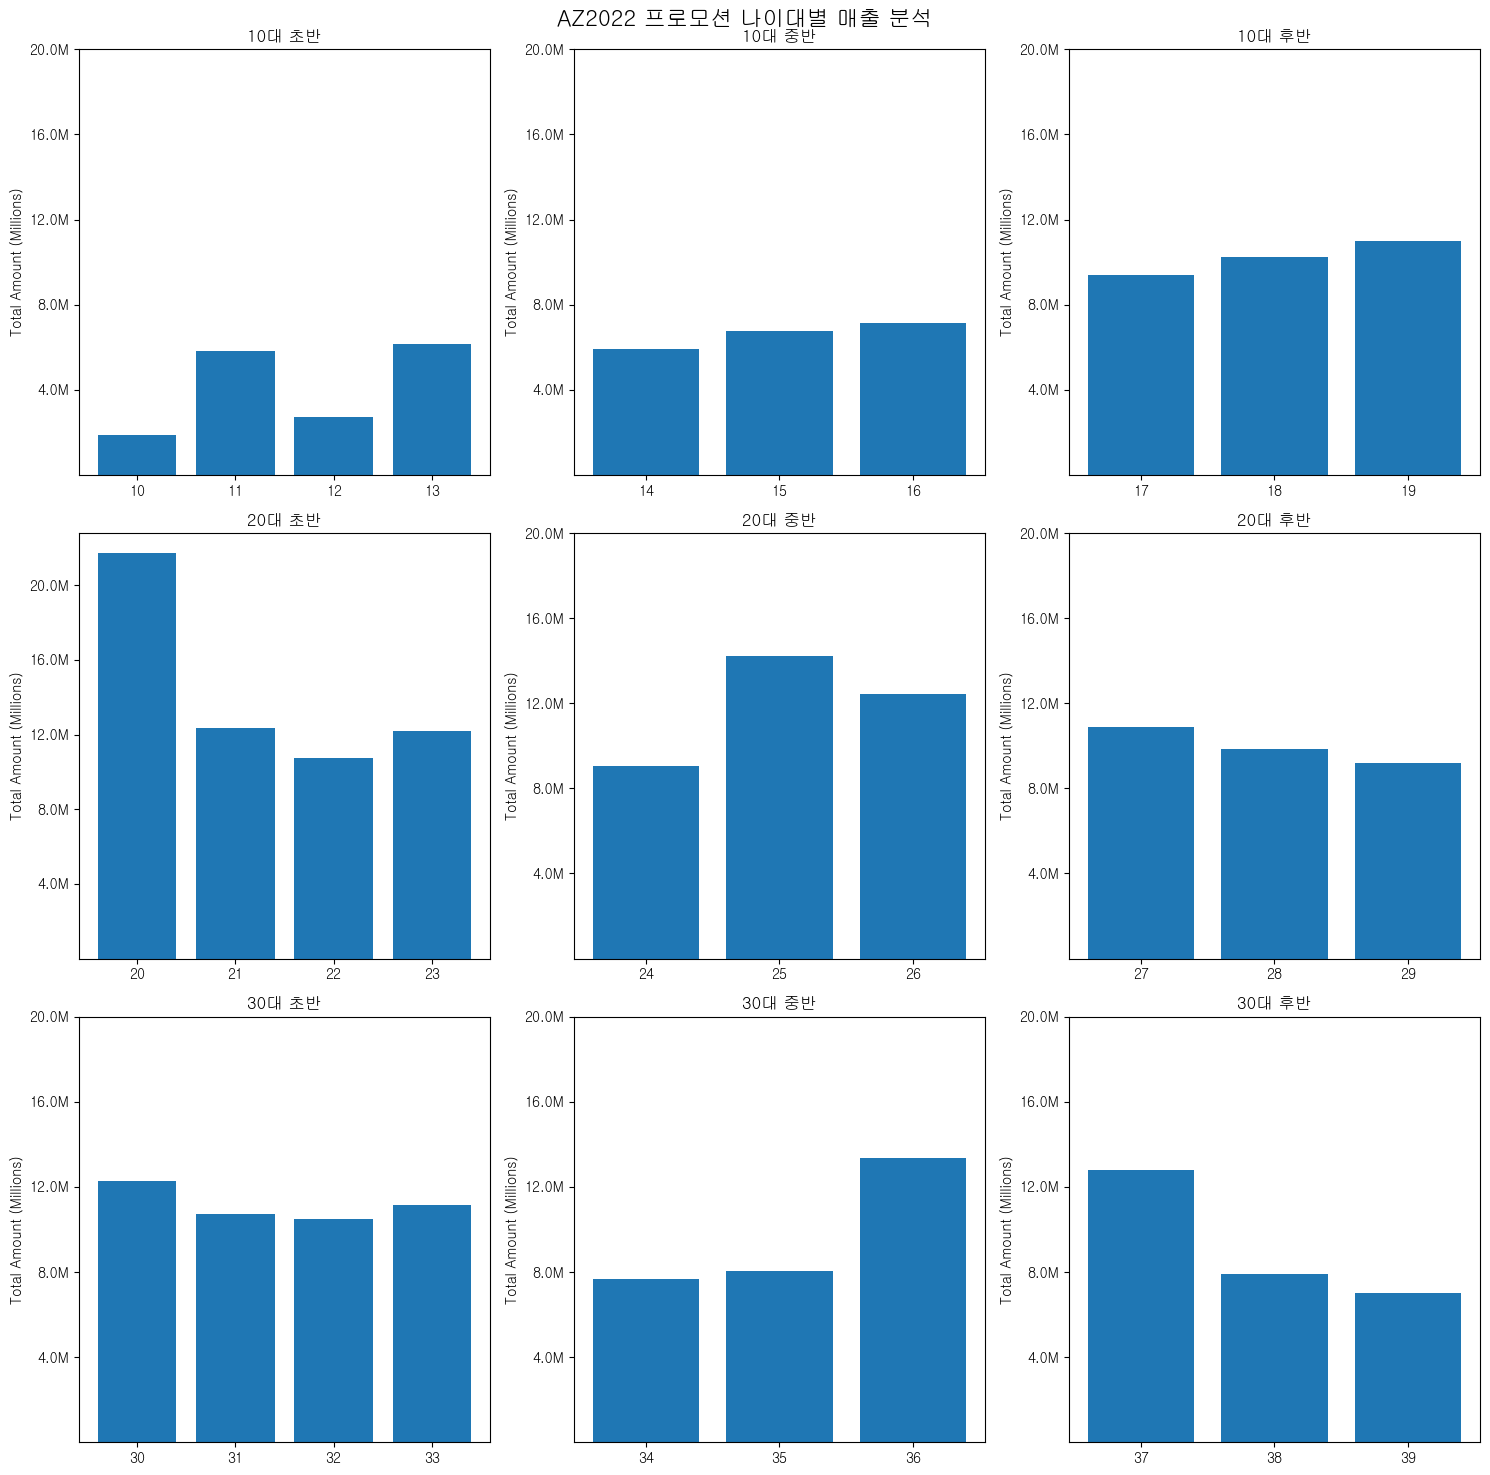

In [149]:
# az2022  나이별 매출 경향 
df_az = df_tran_cus[df_tran_cus['promo_code'] =='AZ2022']

grades = ['유아', '10대 초반','10대 중반', '10대 후반', '20대 초반', '20대 중반', '20대 후반' ,'30대 초반', '30대 중반', '30대 후반', '40대 이상']
cut_bins = [0, 9, 13, 16, 19, 23, 26, 29, 33, 36, 39, 100]

df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)
df_az_1230 = df_az[['나이대', 'total_amount', 'adjusted_age']] # subplot구분용, y축, x축


# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# y축 변환 함수
import matplotlib.ticker as ticker
def format_y_axis_label(value, _):
    return f'{value/1e6:.1f}M'

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('AZ2022 프로모션 나이대별 매출 분석', fontsize=16)
axes = axes.flatten()

for i, string in enumerate(unique):
    ax = axes[i]

    filtered = df_az_1230[df_az_1230['나이대'] == string]
    ax.bar(filtered['adjusted_age'], filtered['total_amount'])
    ax.set_title(string)

    # x 축 값 변환
    ax.set_xticks(filtered['adjusted_age'].unique())

    # y 축 값 변환
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis_label))
    ax.set_ylabel('Total Amount (Millions)')
    ax.set_yticks([4000000, 8000000, 12000000, 16000000, 20000000])

plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\845428618.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


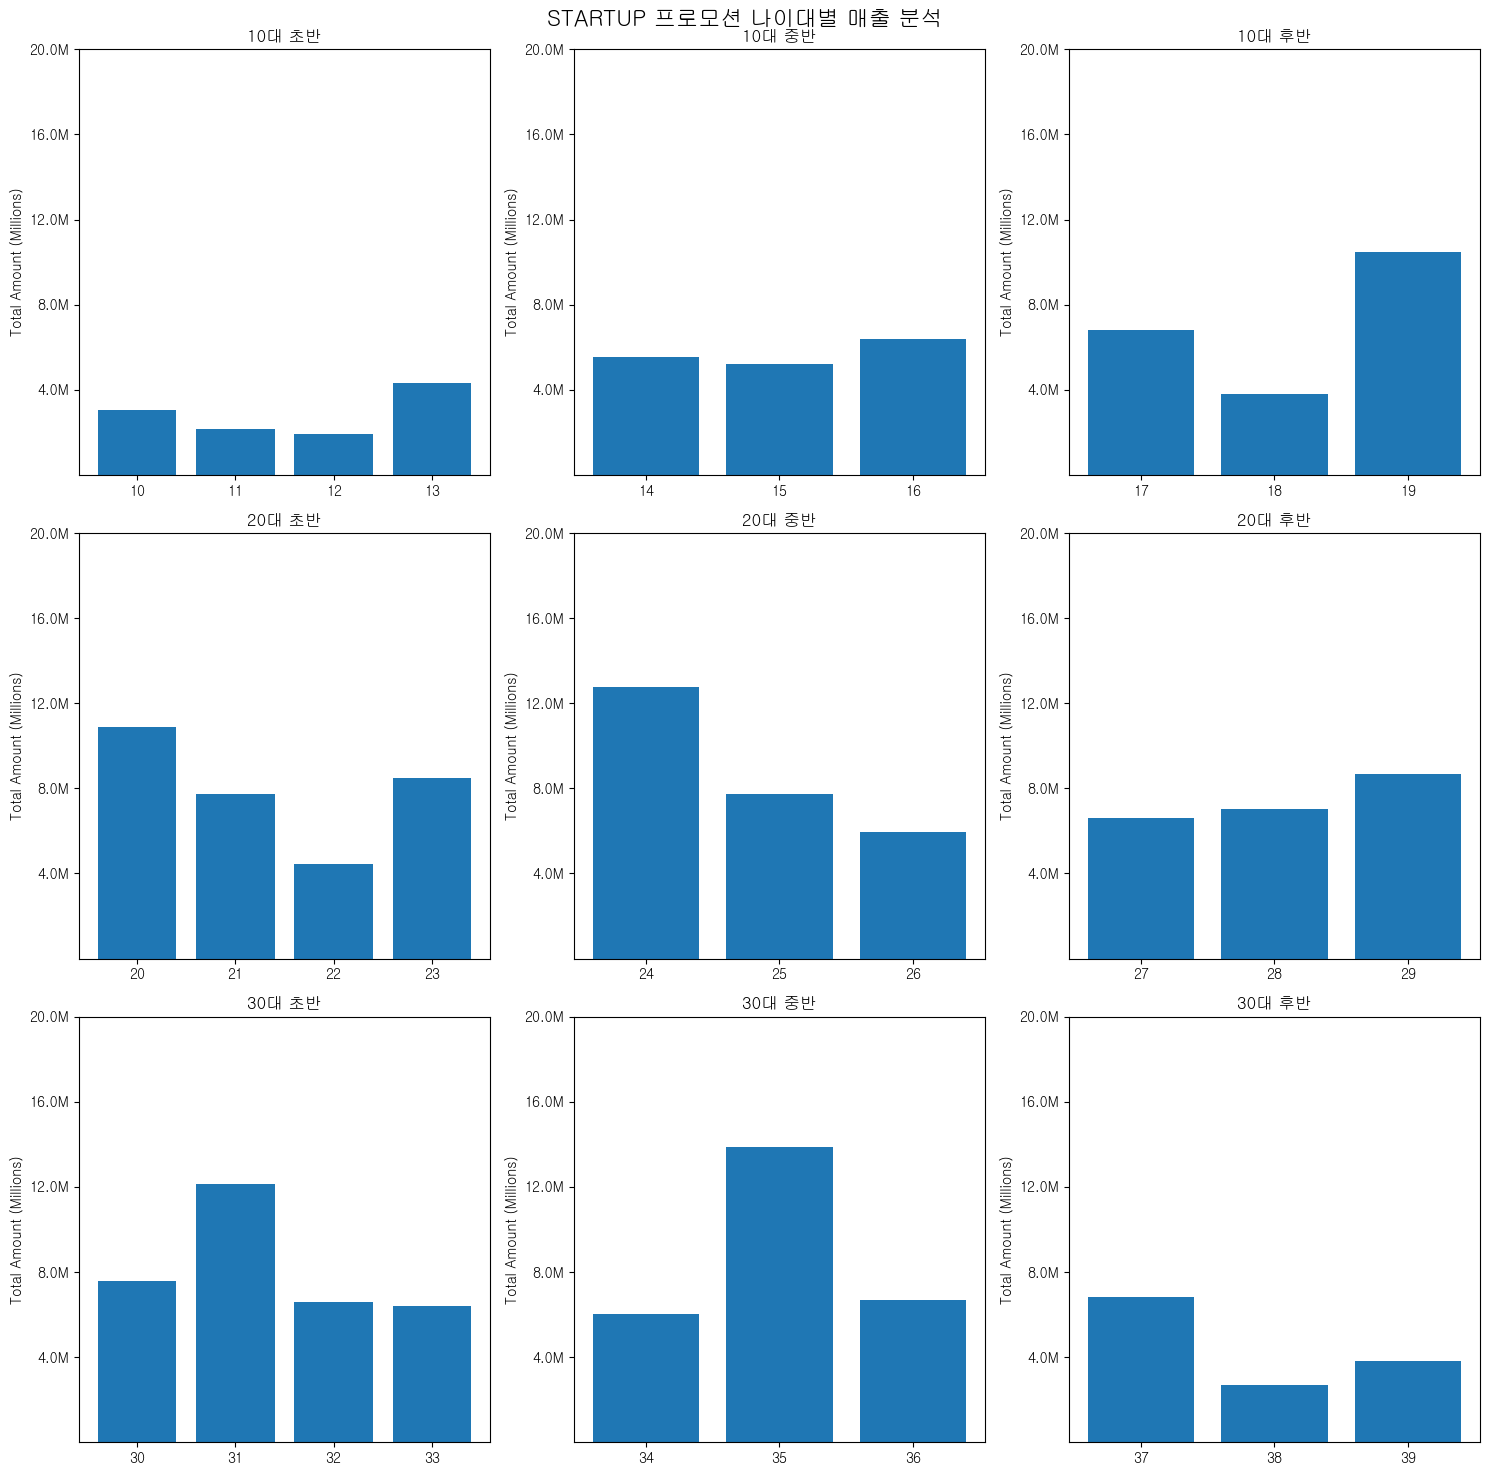

In [151]:
# az2022  나이별 매출 경향 
df_az = df_tran_cus[df_tran_cus['promo_code'] =='STARTUP']

grades = ['유아', '10대 초반','10대 중반', '10대 후반', '20대 초반', '20대 중반', '20대 후반' ,'30대 초반', '30대 중반', '30대 후반', '40대 이상']
cut_bins = [0, 9, 13, 16, 19, 23, 26, 29, 33, 36, 39, 100]

df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)
df_az_1230 = df_az[['나이대', 'total_amount', 'adjusted_age']] # subplot구분용, y축, x축


# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# y축 변환 함수
import matplotlib.ticker as ticker
def format_y_axis_label(value, _):
    return f'{value/1e6:.1f}M'

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('STARTUP 프로모션 나이대별 매출 분석', fontsize=16)
axes = axes.flatten()

for i, string in enumerate(unique):
    ax = axes[i]

    filtered = df_az_1230[df_az_1230['나이대'] == string]
    ax.bar(filtered['adjusted_age'], filtered['total_amount'])
    ax.set_title(string)

    # x 축 값 변환
    ax.set_xticks(filtered['adjusted_age'].unique())

    # y 축 값 변환
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis_label))
    ax.set_ylabel('Total Amount (Millions)')
    ax.set_yticks([4000000, 8000000, 12000000, 16000000, 20000000])

plt.tight_layout()
plt.show()

In [152]:
promo_list = df_tran_cus['promo_code'].unique()
promo_list

array(['WEEKENDSERU', 'Nopromo', 'AZ2022', 'WEEKENDMANTAP', 'BUYMORE',
       'XX2022', 'STARTUP', 'SC2022', 'LIBURDONG'], dtype=object)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\171341890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


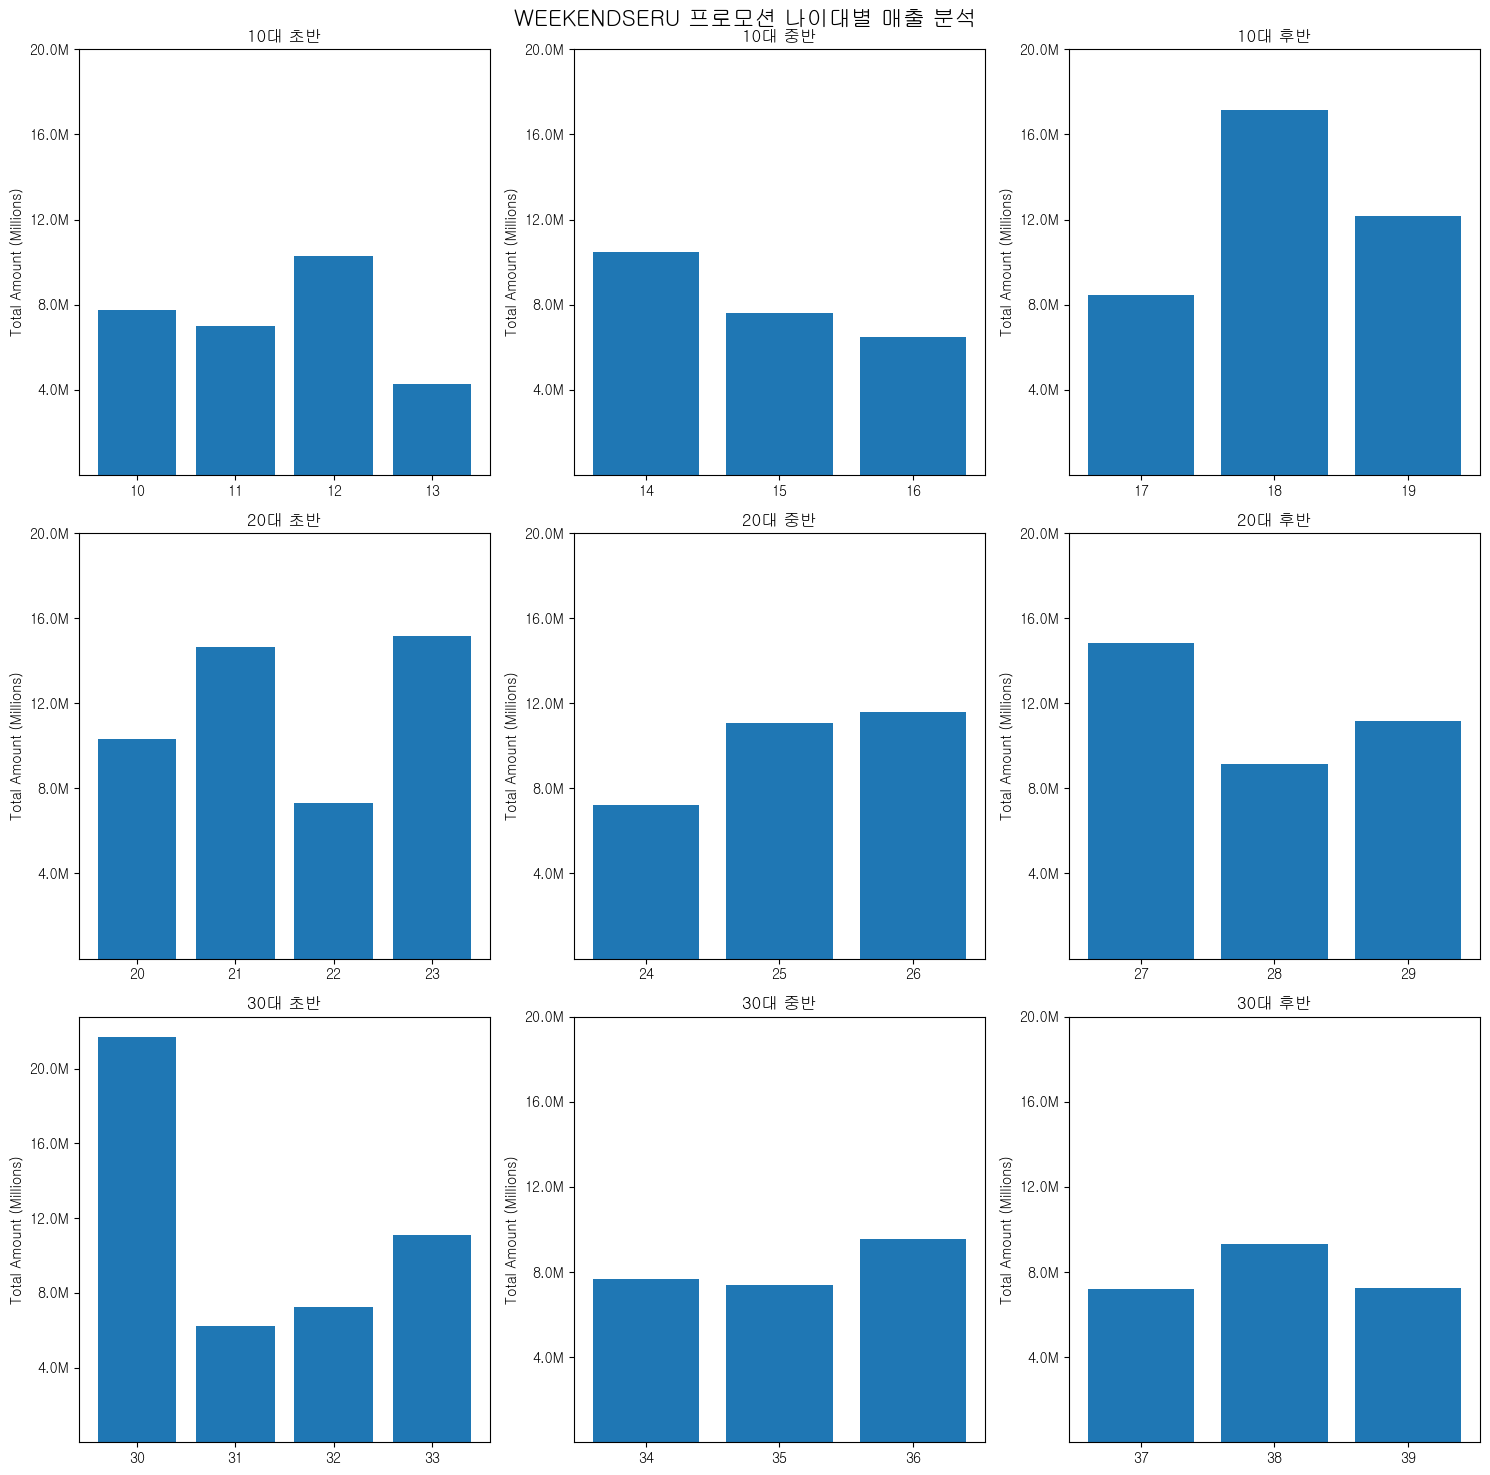

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\171341890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


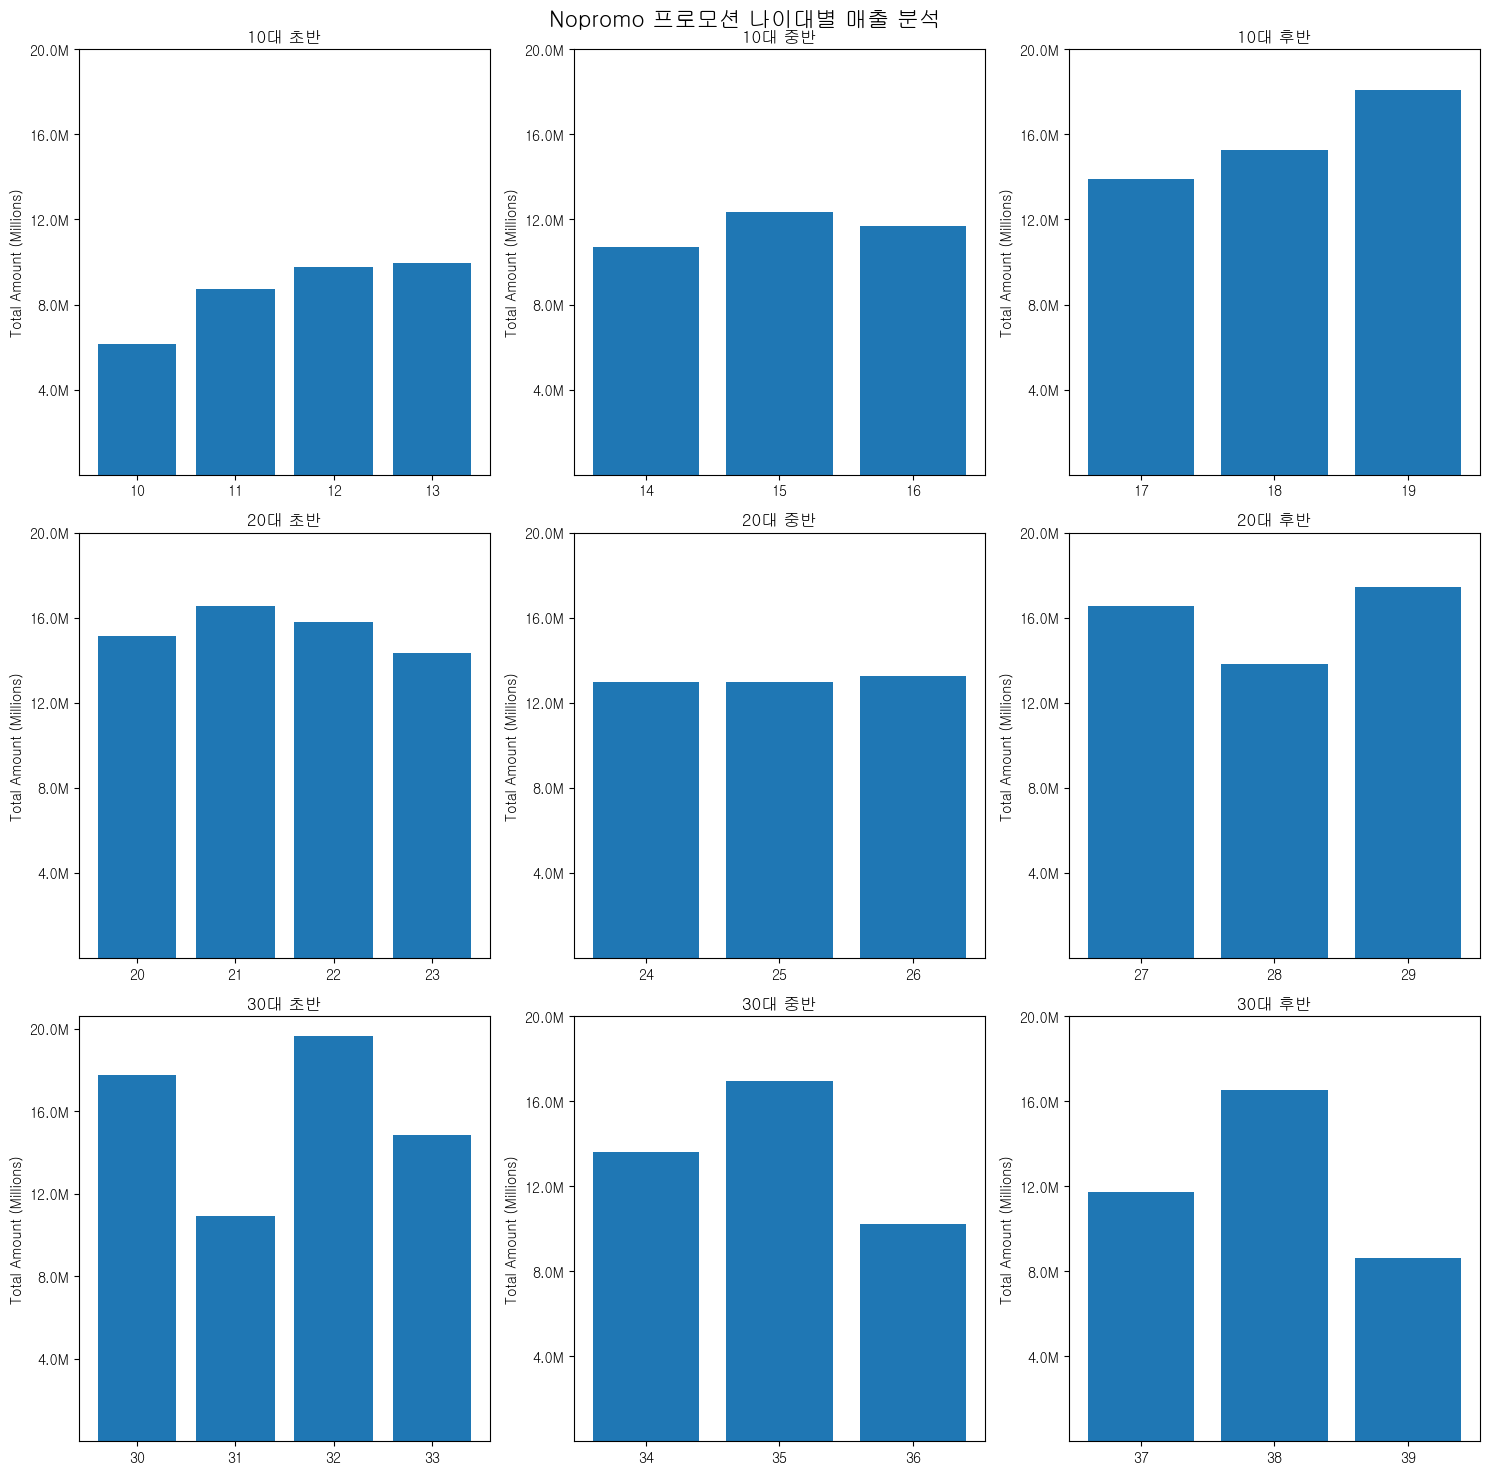

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\171341890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


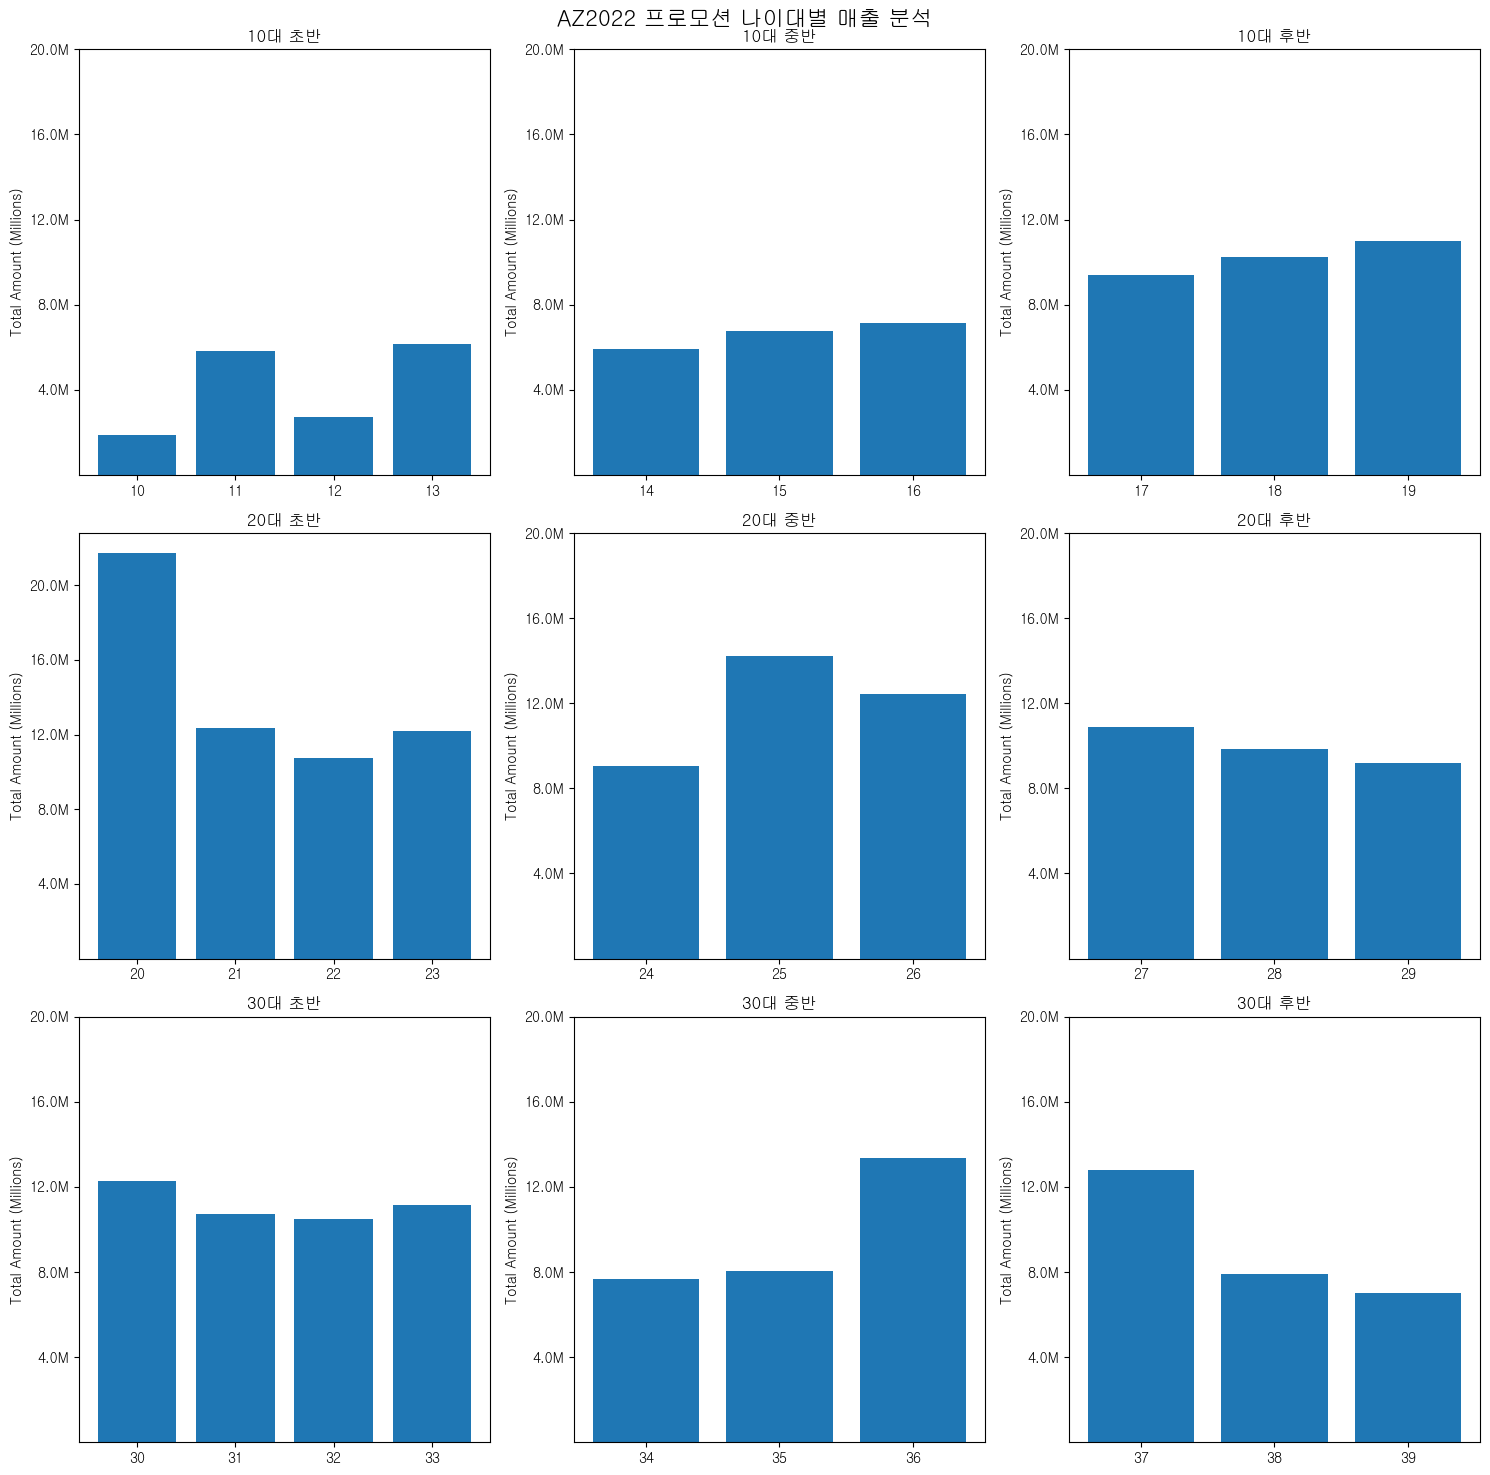

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\171341890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


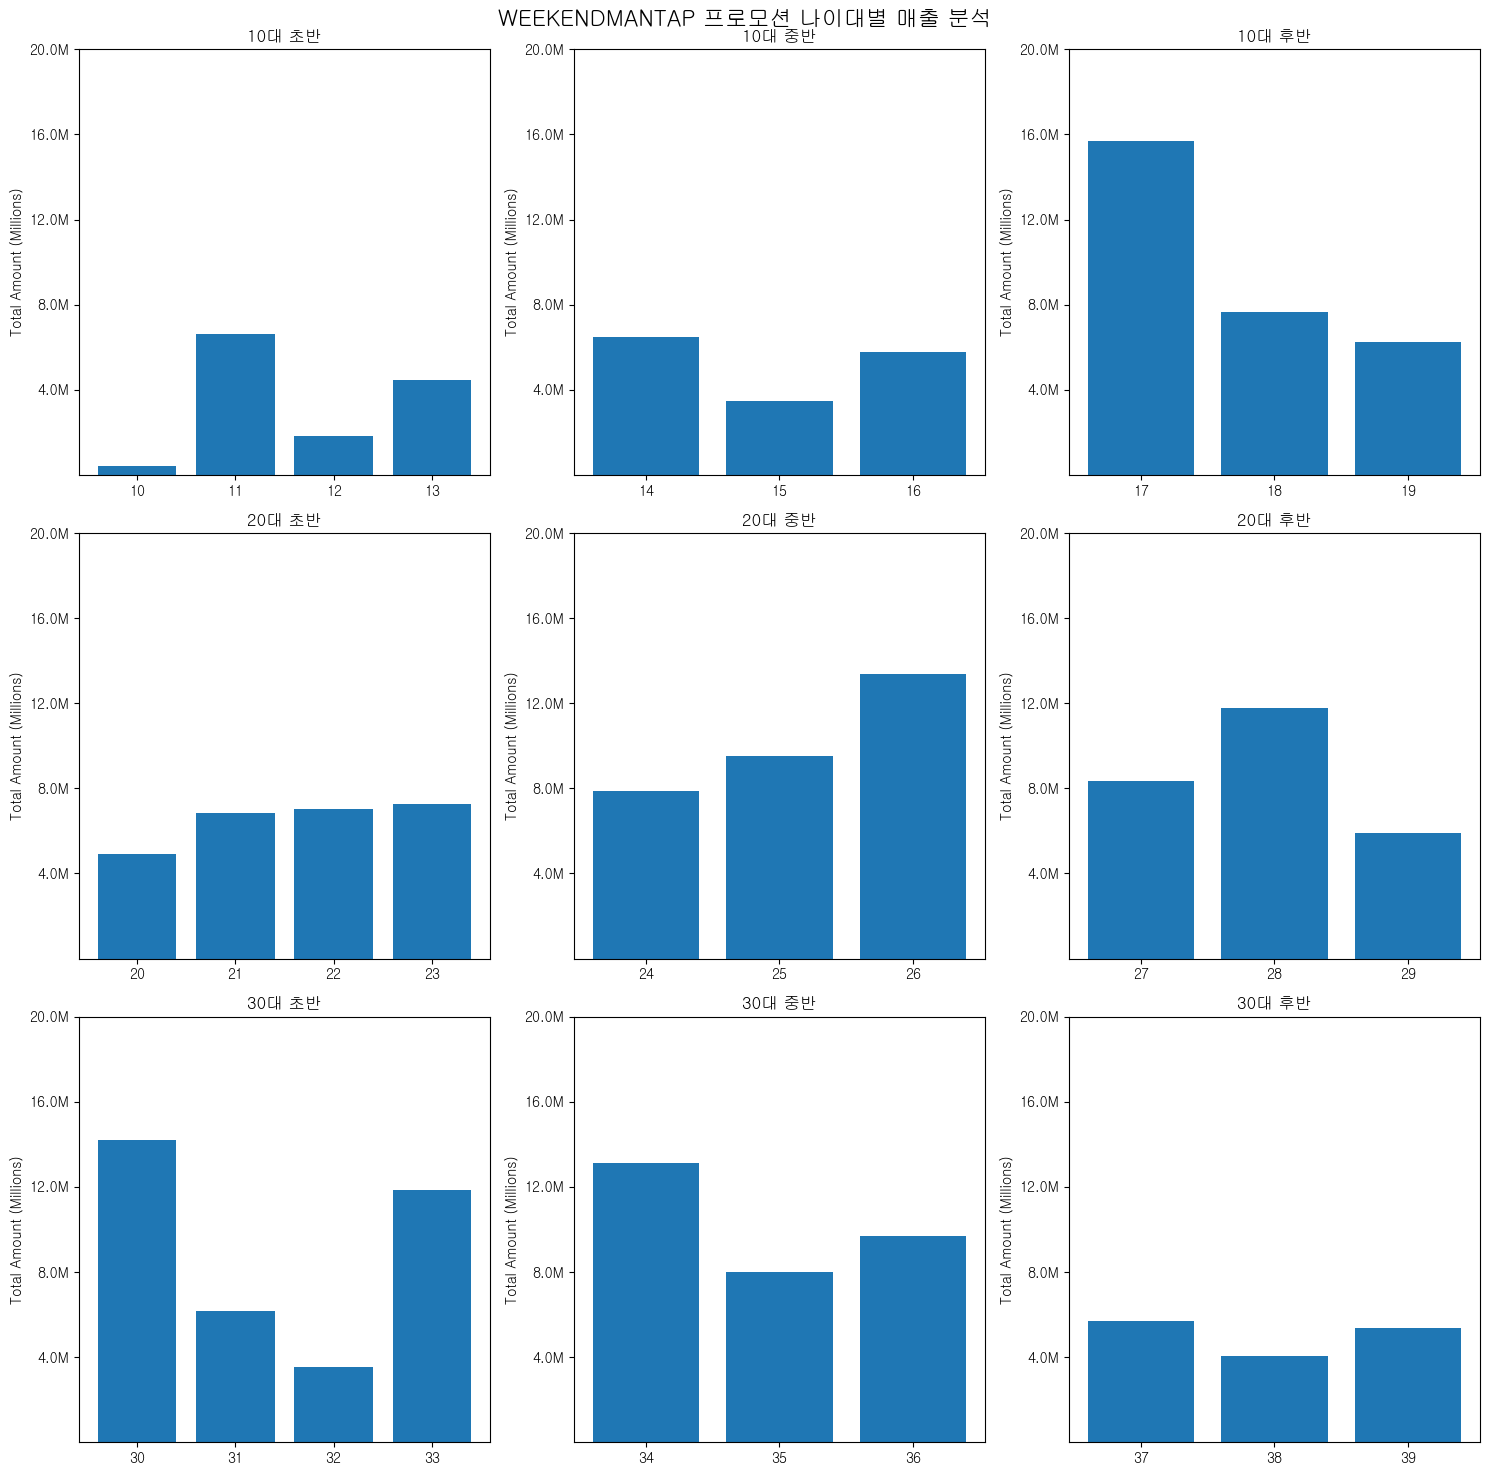

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\171341890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


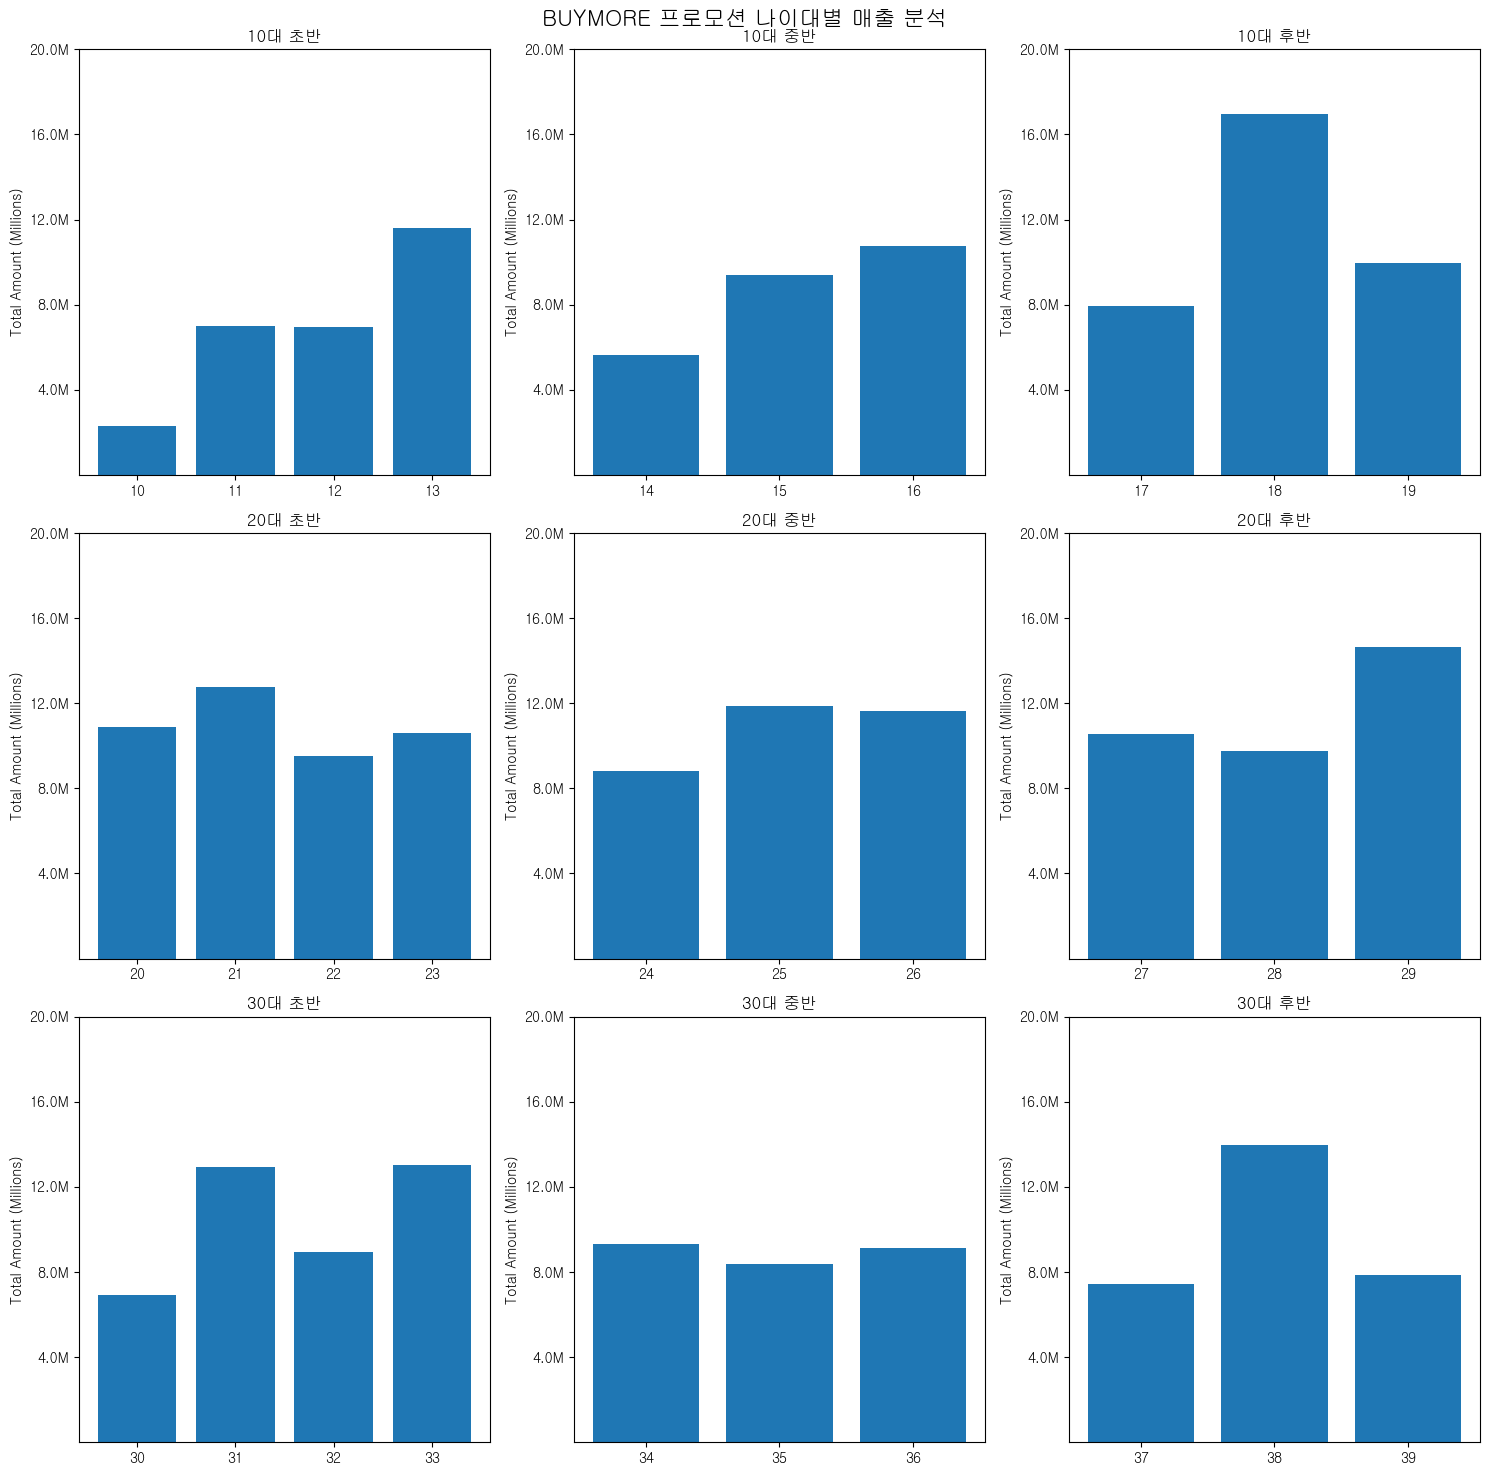

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\171341890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


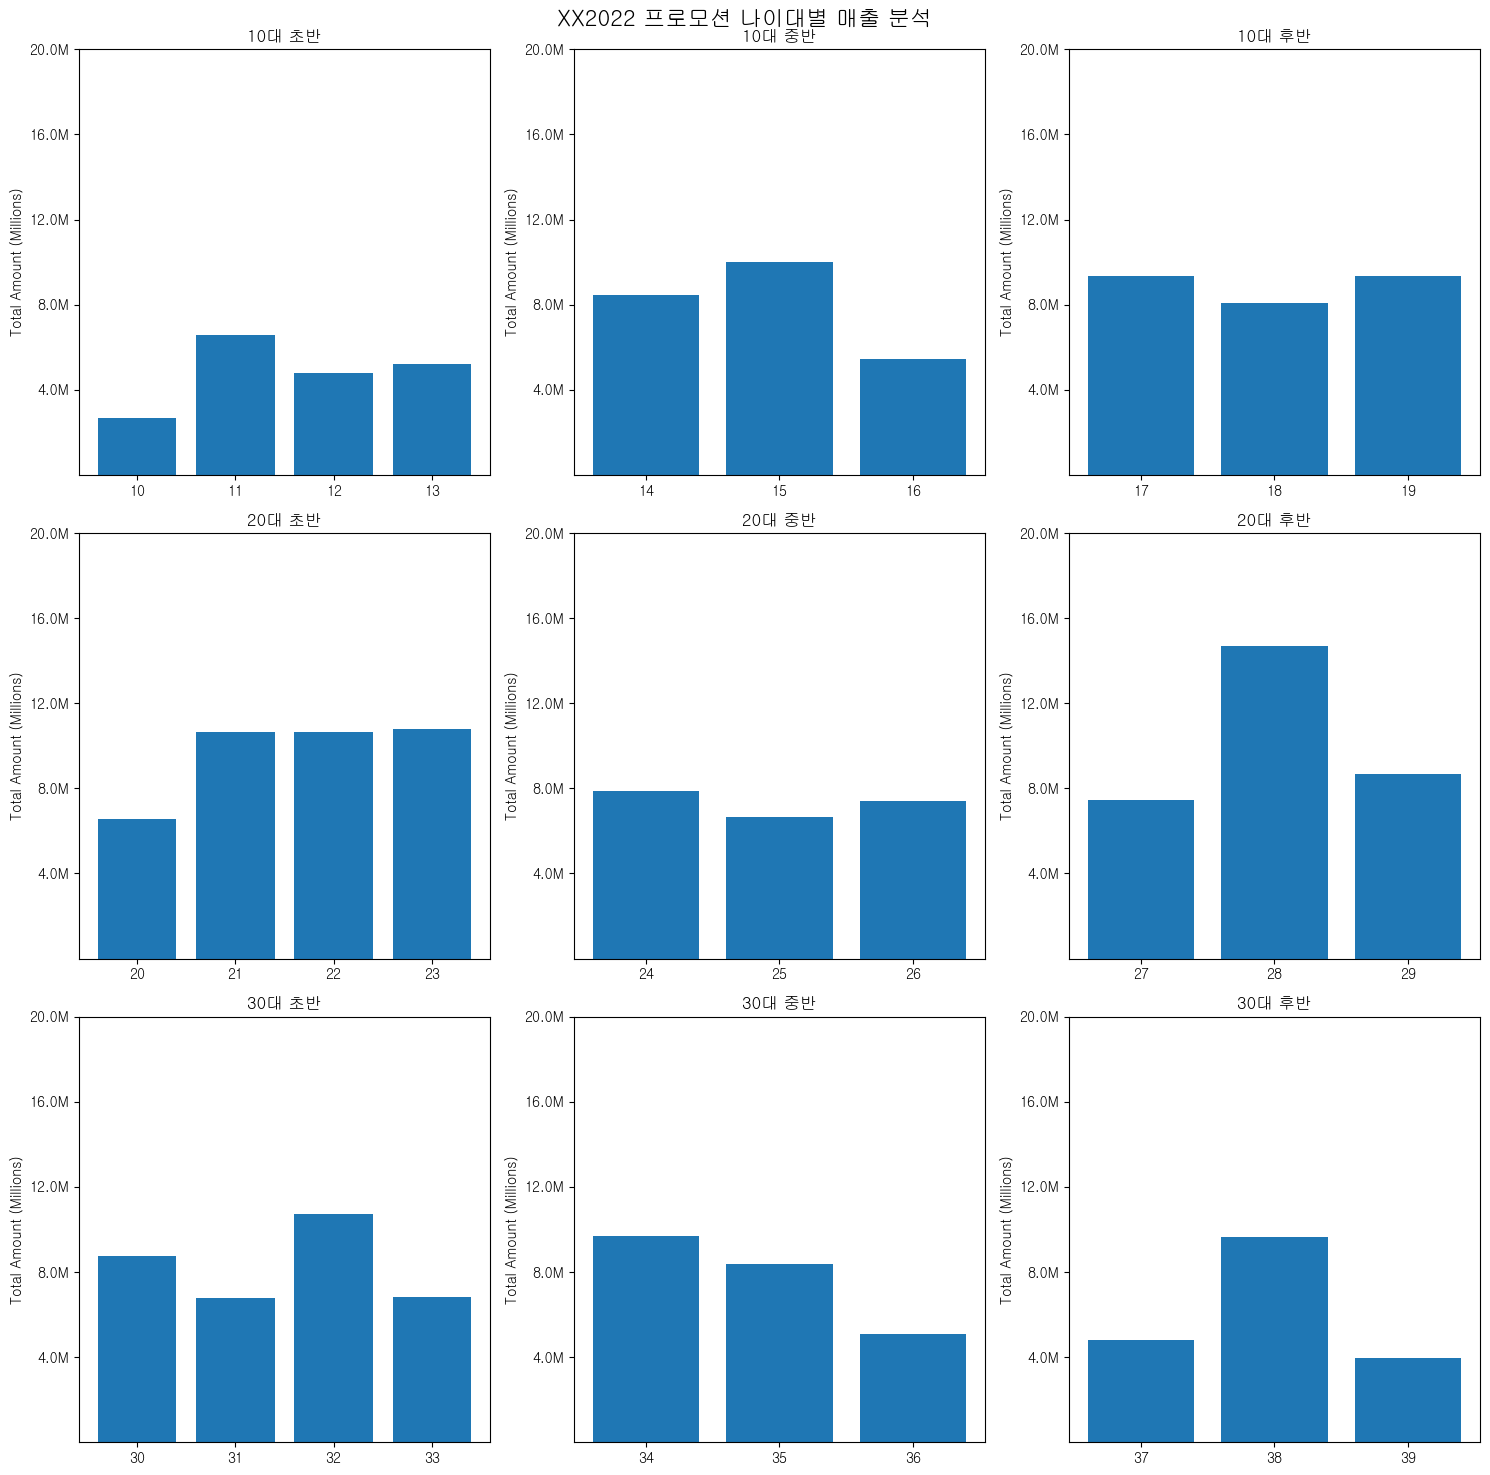

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\171341890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


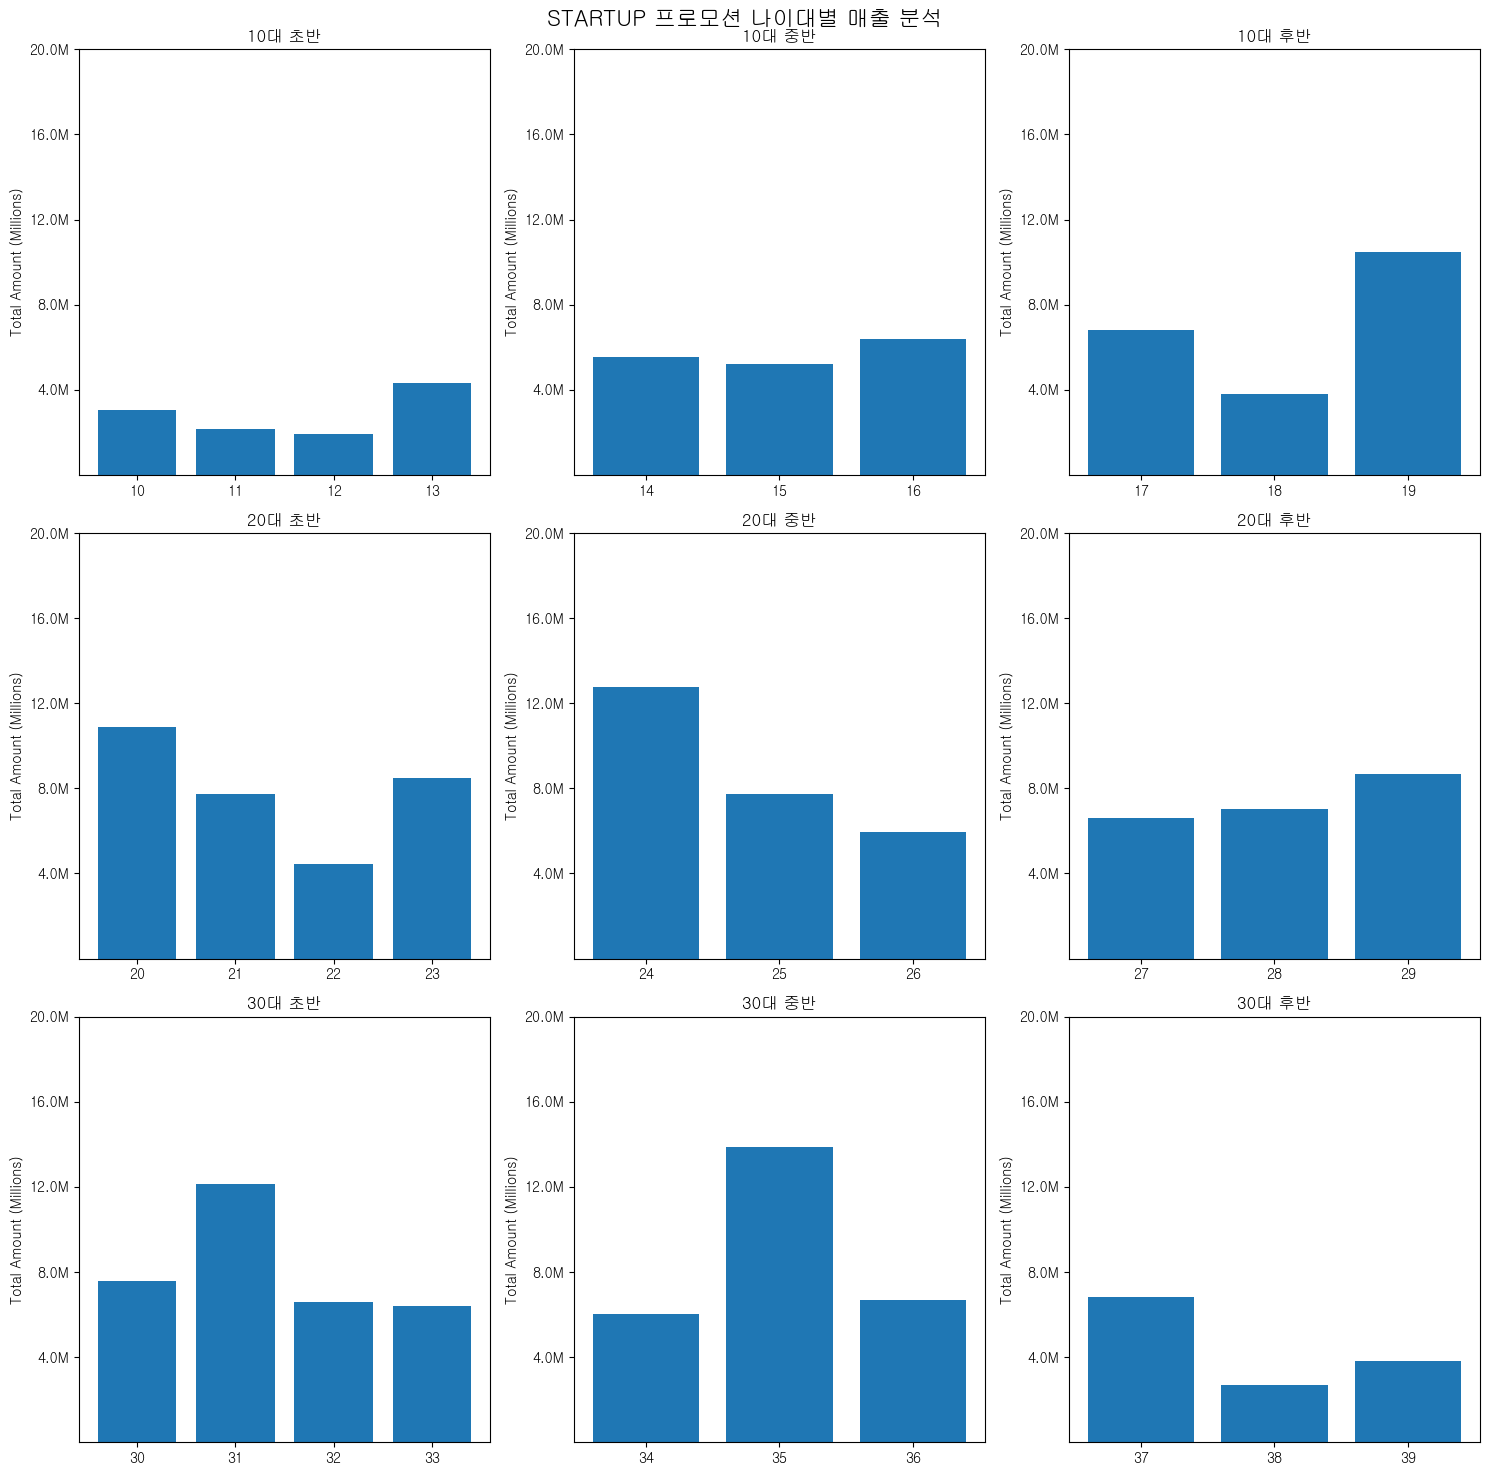

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\171341890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


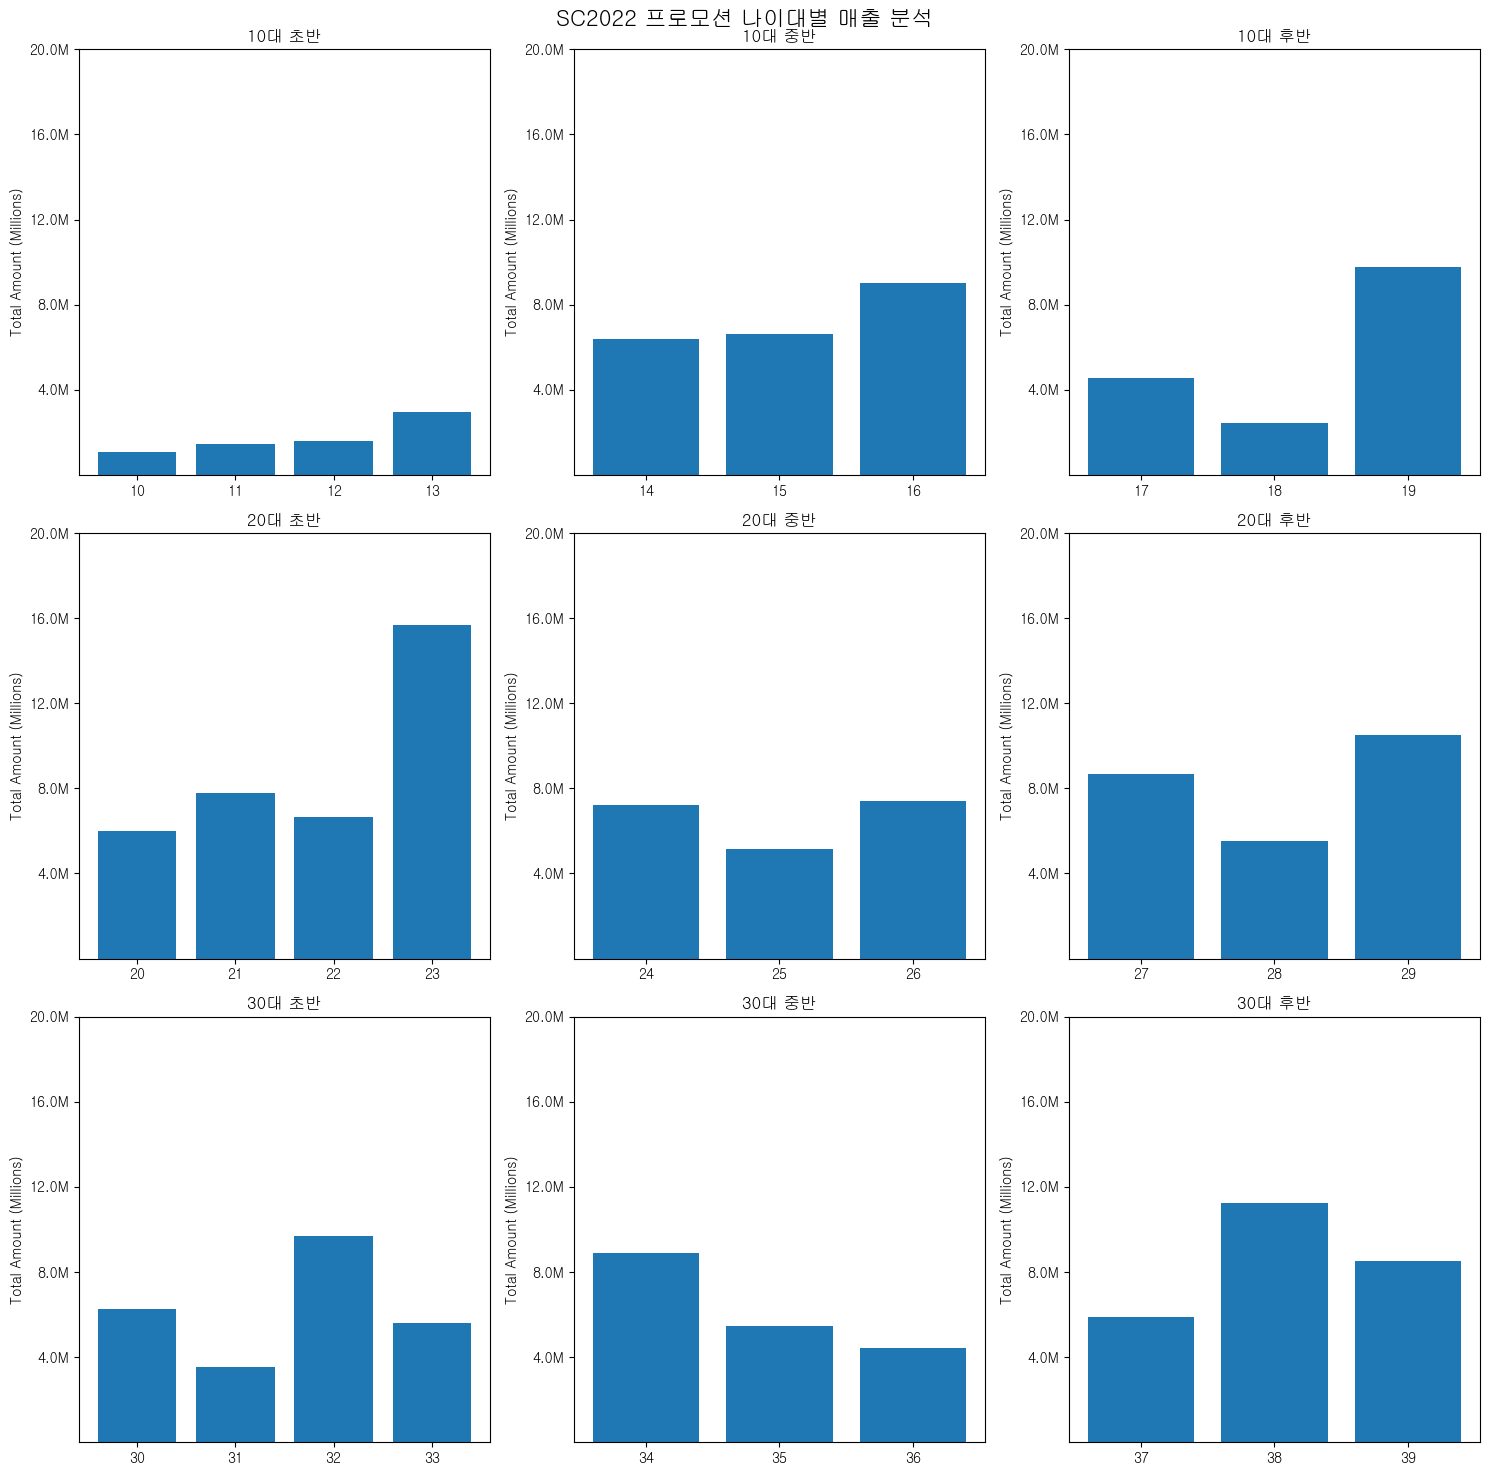

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5416\171341890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)


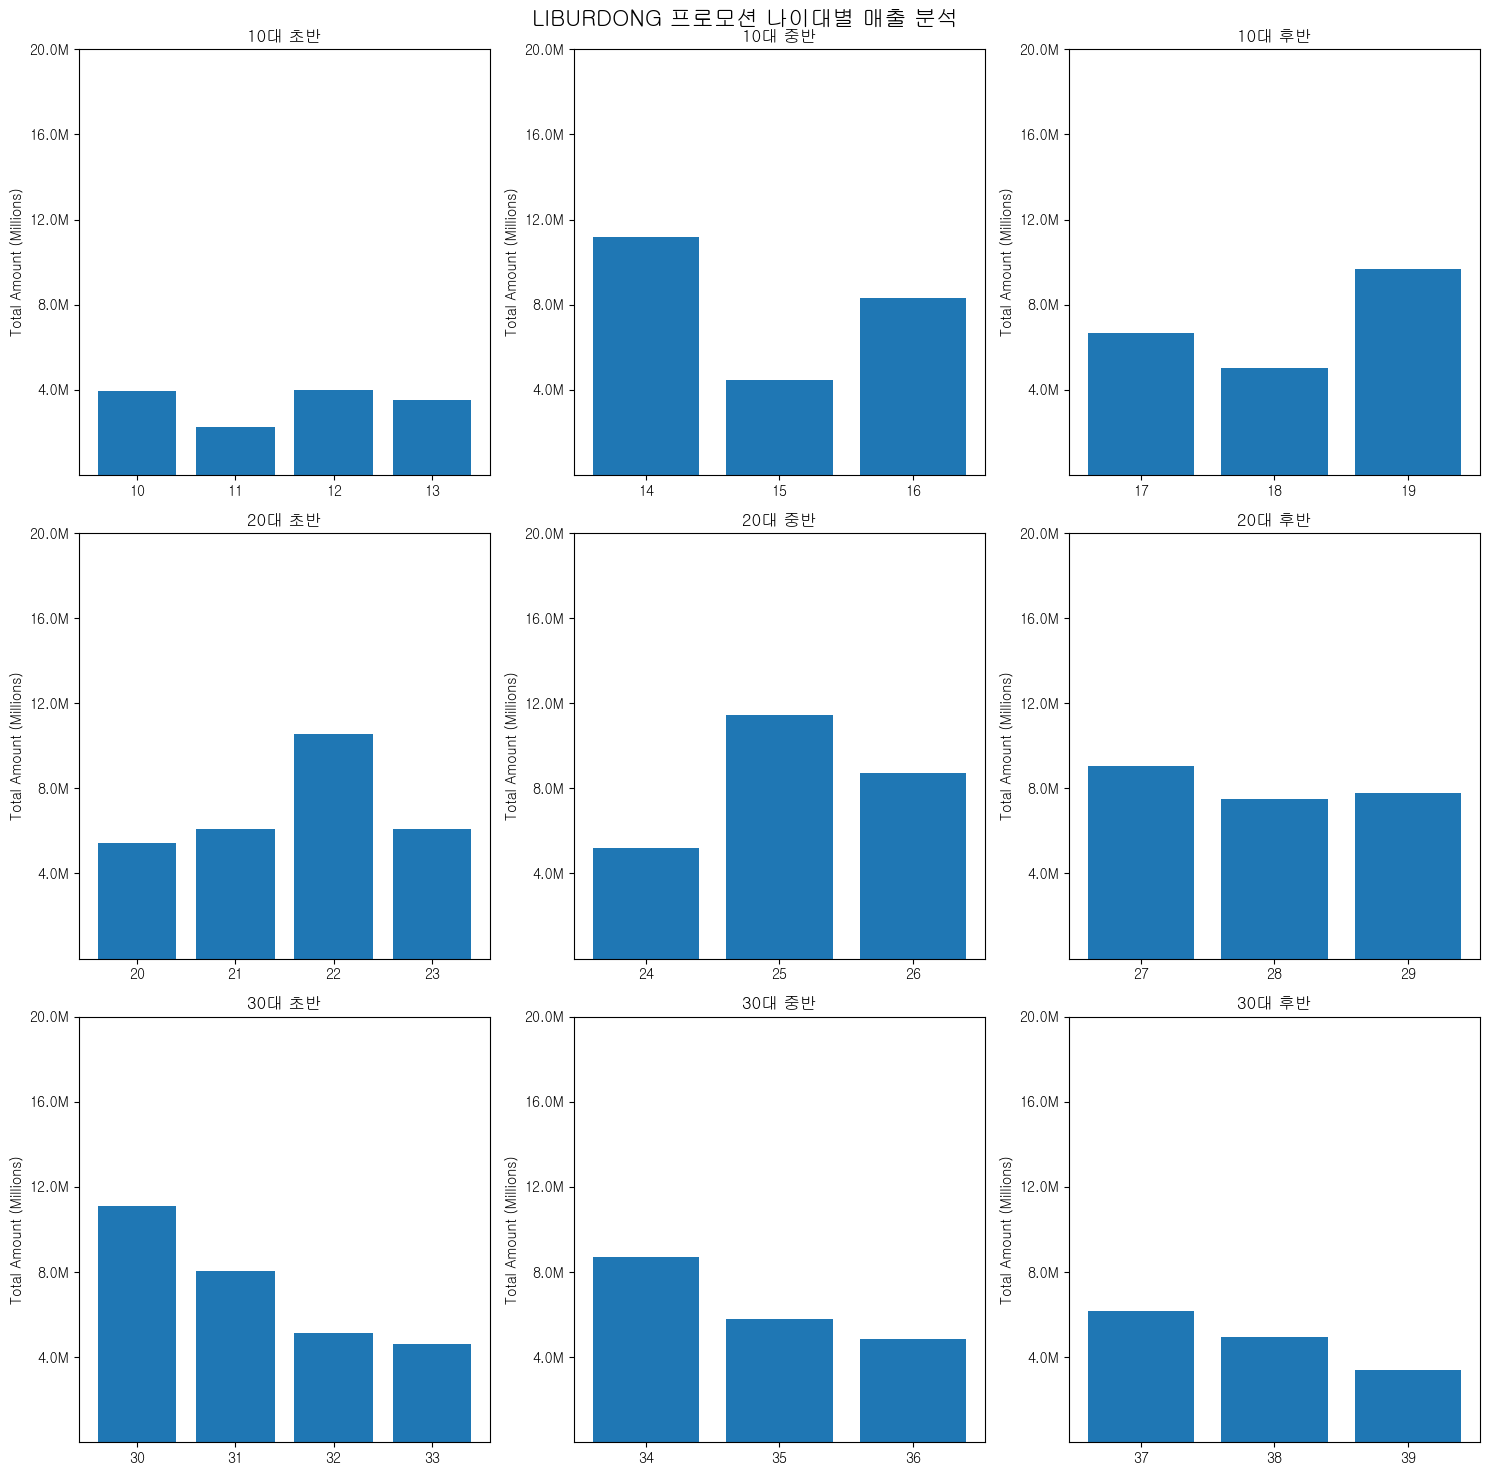

In [153]:
for promo in promo_list:
    #  나이별 매출 경향 
    df_az = df_tran_cus[df_tran_cus['promo_code'] ==f'{promo}']

    grades = ['유아', '10대 초반','10대 중반', '10대 후반', '20대 초반', '20대 중반', '20대 후반' ,'30대 초반', '30대 중반', '30대 후반', '40대 이상']
    cut_bins = [0, 9, 13, 16, 19, 23, 26, 29, 33, 36, 39, 100]

    df_az['나이대'] = pd.cut(df_az['adjusted_age'], bins = cut_bins, labels = grades)
    df_az_1230 = df_az[['나이대', 'total_amount', 'adjusted_age']] # subplot구분용, y축, x축


    # 한글 폰트 사용을 위해서 세팅
    from matplotlib import font_manager, rc
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    # y축 변환 함수
    import matplotlib.ticker as ticker
    def format_y_axis_label(value, _):
        return f'{value/1e6:.1f}M'

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    fig.suptitle(f'{promo} 프로모션 나이대별 매출 분석', fontsize=16)
    axes = axes.flatten()

    for i, string in enumerate(unique):
        ax = axes[i]

        filtered = df_az_1230[df_az_1230['나이대'] == string]
        ax.bar(filtered['adjusted_age'], filtered['total_amount'])
        ax.set_title(string)

        # x 축 값 변환
        ax.set_xticks(filtered['adjusted_age'].unique())

        # y 축 값 변환
        ax.get_yaxis().get_major_formatter().set_scientific(False)
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis_label))
        ax.set_ylabel('Total Amount (Millions)')
        ax.set_yticks([4000000, 8000000, 12000000, 16000000, 20000000])

    plt.tight_layout()
    plt.show()